# **SDS-CP023-Diamond Price Prediction**

## **Problem Definition**

### **The Context:**

 - Why is this problem important to solve?
To build a model that will predict the price of diamond based on the following features/attributes - carat, cut, color, clarity, depth, and dimensions. 

### **The objective:**

 - What is the intended goal?
To predict price that matches the actual price 95% of the time.

### **The key questions:**

- What are the key questions that need to be answered?
1. 
2. 


## **Data Description:**



* **Price:** cost of diamond in US dollars $

* **carat:** weight of the diamond

* **cut:** represents the 'shine' with the following categories: ideal, premium, good, very good and fair

* **color:** the color is for visual appeal. Values range from D to J. 

* **clarity:** explains the internal diamond purity with these classifications - SI2 SI1 VS1 VS2 VVS2 VVS1 and I1.

* **depth:** represents the diamond depth percentage

* **table:** measure of flatness at the top

* **dimensions:** different measurements from the flat surface - x = width, y = length, z = height


### **Import the necessary libraries**

In [165]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import(
 LabelEncoder,
 OneHotEncoder,
 OrdinalEncoder)
from sklearn.model_selection import train_test_split #for Linear and Logistic Regression modeling

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

import joblib

### **Read the dataset**

In [166]:
diamdata=pd.read_csv("C:/Users/adann/Desktop/gitDocuments/sds_diamond_beginner_project/type of the Diamond new.csv")

In [167]:
# Copying data to another variable to avoid any changes to original data
data=diamdata.copy()

### **Print the first and last 5 rows of the dataset**

In [168]:
# Display first five rows

data.head()

cut color clarity  carat  depth  table  price  x (Premium)  z (Very Good)  \
0  Fair     E     VS2   0.22   65.1   61.0    337         3.87           2.49   
1  Fair     E     SI2   0.86   55.1   69.0   2757         6.45           3.52   
2  Fair     F     SI2   0.96   66.3   62.0   2759         6.27           4.07   
3  Fair     F     VS2   0.70   64.5   57.0   2762         5.57           3.58   
4  Fair     F     VS2   0.70   65.3   55.0   2762         5.63           3.66   

   y (Good)  
0      3.78  
1      6.33  
2      5.95  
3      5.53  
4      5.58

In [169]:
#rename x, z, y columns
data.rename(columns={'x (Premium)':'x_(Premium)', 'z (Very Good)':'z_(Very Good)', 'y (Good)':'y_(Good)'}, inplace = True)

In [170]:
#Reorder the columns..
data = data[['cut', 'color', 'clarity', 'carat', 'depth', 'table', 'x_(Premium)', 'z_(Very Good)', 'y_(Good)', 'price',]]

In [13]:
# re-print the first five rows

data.head()

cut color clarity  carat  depth  table  x_(Premium)  z_(Very Good)  \
0  Fair     E     VS2   0.22   65.1   61.0         3.87           2.49   
1  Fair     E     SI2   0.86   55.1   69.0         6.45           3.52   
2  Fair     F     SI2   0.96   66.3   62.0         6.27           4.07   
3  Fair     F     VS2   0.70   64.5   57.0         5.57           3.58   
4  Fair     F     VS2   0.70   65.3   55.0         5.63           3.66   

   y_(Good)  price  
0      3.78    337  
1      6.33   2757  
2      5.95   2759  
3      5.53   2762  
4      5.58   2762

In [9]:
# Display last 5 rows
data.tail()

cut color clarity  carat  depth  table  x_(Premium)  \
53935  Very Good     E     VS2    0.7   62.8   60.0         5.59   
53936  Very Good     D     VS1    0.7   63.1   59.0         5.67   
53937  Very Good     E     VS2    0.7   60.5   59.0         5.71   
53938  Very Good     E     VS2    0.7   61.2   59.0         5.69   
53939  Very Good     D     SI1    0.7   62.8   60.0         5.66   

       z_(Very Good)  y_(Good)  price  
53935           3.53      5.65   2755  
53936           3.55      5.58   2755  
53937           3.47      5.76   2757  
53938           3.49      5.72   2757  
53939           3.56      5.68   2757

### **Understand the shape of the dataset**

In [10]:
# Check the shape of the data

data.shape

(53940, 10)

**Insights __::**
- The data contains **53,940 observations and 10 columns**.

### **Check the data types of the columns**

In [22]:
# Check info of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   cut            53940 non-null  object 
 1   color          53940 non-null  object 
 2   clarity        53940 non-null  object 
 3   carat          53940 non-null  float64
 4   depth          53940 non-null  float64
 5   table          53940 non-null  float64
 6   x_(Premium)    53940 non-null  float64
 7   z_(Very Good)  53940 non-null  float64
 8   y_(Good)       53940 non-null  float64
 9   price          53940 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


**Insights ______________**
- There are no missing values for any of the observations and columns. 
- There are only three categorical variables, the rest are numerical.

### **Check for missing values**

In [8]:
# Analyse missing values - Hint: use isnull() function
data.isnull().sum()

cut              0
color            0
clarity          0
carat            0
depth            0
table            0
price            0
x (Premium)      0
z (Very Good)    0
y (Good)         0
dtype: int64

In [9]:
# Check the percentage of missing values in the each column.
# Hint: divide the result from the previous code by the number of rows in the dataset

data.isnull().sum()/data.shape[0]

cut              0.0
color            0.0
clarity          0.0
carat            0.0
depth            0.0
table            0.0
price            0.0
x (Premium)      0.0
z (Very Good)    0.0
y (Good)         0.0
dtype: float64

**The percentage of missing values is 0% for all variables/columns.**

**We can convert the object type columns to categories**

`converting "objects" to "category" reduces the data space required to store the dataframe`

### **Convert the data types???**

In [63]:
cols = data.select_dtypes(['object']).columns.tolist()

#adding target variable to this list as this is an classification problem and the target variable is categorical


In [171]:
cols

['cut', 'color', 'clarity']

In [12]:
# Changing the data type of object type column to category. hint use astype() function

for i in cols:
    data[i] = data[i].astype("category")

In [13]:
# Checking the info again and the datatype of different variable

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   cut            53940 non-null  category
 1   color          53940 non-null  category
 2   clarity        53940 non-null  category
 3   carat          53940 non-null  float64 
 4   depth          53940 non-null  float64 
 5   table          53940 non-null  float64 
 6   price          53940 non-null  int64   
 7   x (Premium)    53940 non-null  float64 
 8   z (Very Good)  53940 non-null  float64 
 9   y (Good)       53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [172]:
Q1= np.percentile(data["price"], 25)
print(Q1)

950.0


### **Analyze Summary Statistics of the dataset**

In [173]:
# Analyze the summary statistics for numerical variables

data.describe(include = 'number').T

count         mean          std    min     25%      50%  \
carat          53940.0     0.797940     0.474011    0.2    0.40     0.70   
depth          53940.0    61.749405     1.432621   43.0   61.00    61.80   
table          53940.0    57.457184     2.234491   43.0   56.00    57.00   
x_(Premium)    53940.0     5.731157     1.121761    0.0    4.71     5.70   
z_(Very Good)  53940.0     3.538734     0.705699    0.0    2.91     3.53   
y_(Good)       53940.0     5.734526     1.142135    0.0    4.72     5.71   
price          53940.0  3932.799722  3989.439738  326.0  950.00  2401.00   

                   75%       max  
carat             1.04      5.01  
depth            62.50     79.00  
table            59.00     95.00  
x_(Premium)       6.54     10.74  
z_(Very Good)     4.04     31.80  
y_(Good)          6.54     58.90  
price          5324.25  18823.00

In [174]:
#Categorize the features by type:
numerical_features = ['carat', 'depth', 'table', 'price', 'x_(Premium)', 'z_(Very Good)', 'y_(Good)']
categorical_features = ['cut', 'color', 'clarity']

**Observations**

- Average carat is .798, maximum is 5.01. Minimum is 0.2.  
- For the depth, the average is 61.7, max is 79 with a std dev of 1.43. 
- The table measurements are close, ranging from minimum of 43 to max of 95. Average is 57.
- Price is the target dependent variable we need to predict. It has a high standard deviation indicating high variance meaning a lot of the diamond rings are highly expensive. Minimum price is 326, ranging up to a maximum of 18000. 50% of the diamonds cost $2,400.
- Max or oldest CLAGE is 1168. Average age is 175 while std dev is 85.
 - For the dimension, the Premium (x = width) has the lowest maximum among the 3 dimensions.


In [145]:
# Check summary for categorical data.

#data.describe(include = "category").T

**Insights**

- This table lists the hightest categories among the categorical variables.
- The hightest cut/shine is the "Ideal" option.
- The predominant color is "G".
- The highest clarity, indicating diamond purity is Sl1.

**Let's look at the unique values in all the categorical variables**

In [15]:
# Checking the count of unique values in each categorical column 

cols_cat= data.select_dtypes(['category'])

for i in cols_cat.columns:
    print('Unique values in',i, 'are :')
    print(data[i].nunique(dropna = False))
    print('*'*40)

### **Think about it**
- The results above gave the absolute count of unique values in each categorical column. Are absolute values a good measure? 
- If not, what else can be used? Try implementing that. 

In [19]:
#To print the actual unique values..

cols_cat= data.select_dtypes(['category'])

for i in cols_cat.columns:
    print('Unique values in',i, 'are :')
    print(data[i].value_counts(dropna = False))
    print('*'*40)

Unique values in cut are :
cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64
****************************************
Unique values in color are :
color
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: count, dtype: int64
****************************************
Unique values in clarity are :
clarity
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: count, dtype: int64
****************************************


**Insights**
- Printing the unique values in each category reveals there is noblank values "NaN".
- There is no need to replace any blank value with median if distribution is skewed or with mean if normal distribution.

In [20]:
#To print the actual % of unique values..

cols_cat= data.select_dtypes(['category'])

for i in cols_cat.columns:
    print('Unique values in',i, 'are :')
    print(data[i].value_counts(dropna = False))
    print('Percentag of unique values in',i, 'are :')
    print(data[i].value_counts(dropna = False)/data[i].shape[0])
    print('*'*40)

Unique values in cut are :
cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64
Percentag of unique values in cut are :
cut
Ideal        0.399537
Premium      0.255673
Very Good    0.223990
Good         0.090953
Fair         0.029848
Name: count, dtype: float64
****************************************
Unique values in color are :
color
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: count, dtype: int64
Percentag of unique values in color are :
color
G    0.209344
E    0.181628
F    0.176900
H    0.153949
D    0.125603
I    0.100519
J    0.052058
Name: count, dtype: float64
****************************************
Unique values in clarity are :
clarity
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: count, dtype: int64
Percentag of unique values in clarity are :
clarity
SI1     0.242214
VS2     0.227253
SI2     0

## **Exploratory Data Analysis (EDA) and Visualization**

## **Univariate Analysis**

Univariate analysis is used to explore each variable in a data set, separately. It looks at the range of values, as well as the central tendency of the values. It can be done for both numerical and categorical variables

### **1. Univariate Analysis - Numerical Data**
Histograms and box plots help to visualize and describe numerical data. We use box plot and histogram to analyze the numerical columns.

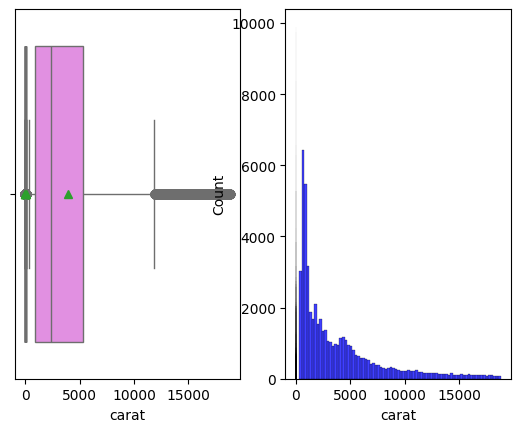

In [140]:
#plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features): #[:6], 1):
    plt.subplot(121)
    sns.boxplot(x = data[feature], showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    plt.subplot(122)
    sns.histplot(x = data[feature], kde=False, color="blue") #, gridspec_kw = {"height_ratios": (.25, .75)}) if bins else sns.histplot(x = data['carat'], kde=False) # For histogram
#    plt.title(f'{feature} Distribution') #palette="winter"
#plt.tight_layout()
plt.show()
#ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
   # ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

#### Using the above function, let's first analyze the Histogram and Boxplot for PRICE

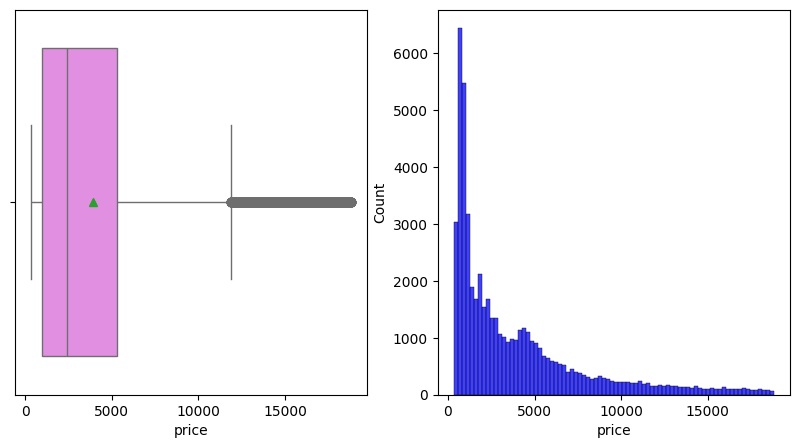

In [11]:
plt.figure(figsize=(10, 5))
plt.subplot(121)
sns.boxplot(x = data['price'], showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
plt.subplot(122)
sns.histplot(x = data['price'], kde=False, color="blue") #, gridspec_kw = {"height_ratios": (.25, .75)}) if bins else sns.histplot(x = data['carat'], kde=False) # For histogram
#    plt.title(f'{feature} Distribution') #palette="winter"
#plt.tight_layout()
plt.show()

**Insights**
- Average price is ~3900. Based on the 25% and 75% IQR indicates that half the people/50% of the price paid is between $1000 - 5000. The outliers are greater than $10,000. The distribution is left-skewed showing that the price of most rings bought are 5000 or less.

#### **Note:** As done above, analyze Histogram and Boxplot for other variables

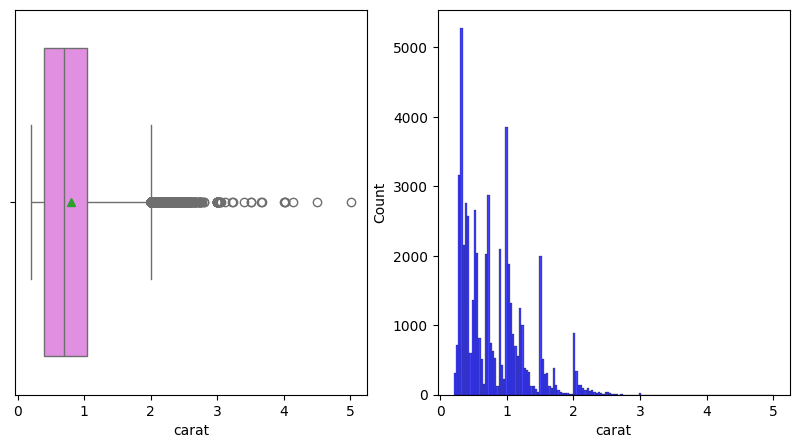

In [12]:
# Build the histogram boxplot for carat
plt.figure(figsize=(10, 5))
plt.subplot(121)
sns.boxplot(x = data['carat'], showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
plt.subplot(122)
sns.histplot(x = data['carat'], kde=False, color="blue") #, gridspec_kw = {"height_ratios": (.25, .75)}) if bins else sns.histplot(x = data['carat'], kde=False) # For histogram
#    plt.title(f'{feature} Distribution') #palette="winter"
#plt.tight_layout()
plt.show()

**Insights**
- The average carat made/bought is less than 1 carat and is higher than the median of .7.

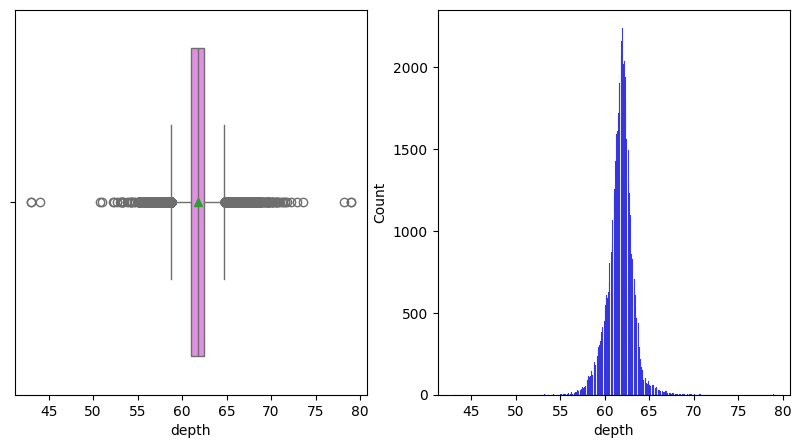

In [13]:
# Build the histogram boxplot for VALUE
plt.figure(figsize=(10, 5))
plt.subplot(121)
sns.boxplot(x = data['depth'], showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
plt.subplot(122)
sns.histplot(x = data['depth'], kde=False, color="blue") #, gridspec_kw = {"height_ratios": (.25, .75)}) if bins else sns.histplot(x = data['carat'], kde=False) # For histogram
#    plt.title(f'{feature} Distribution') #palette="winter"
#plt.tight_layout()
plt.show()

**Insights**
- The depthn follows a normal distribution.
- The median and mean seem equal.

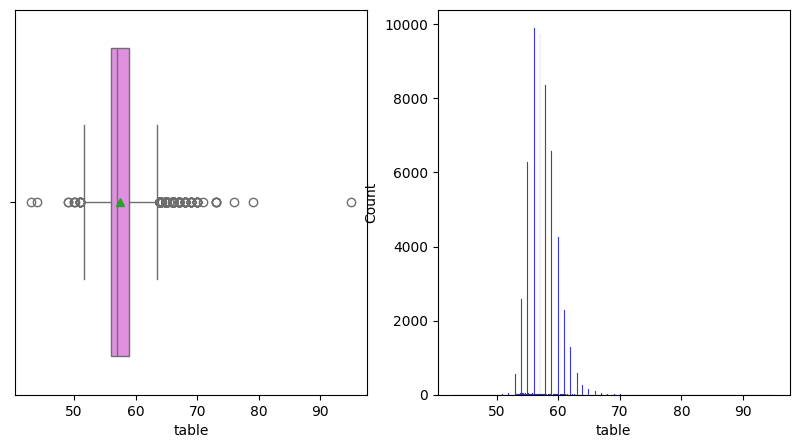

In [14]:
# Build the histogram boxplot for YOJ
plt.figure(figsize=(10, 5))
plt.subplot(121)
sns.boxplot(x = data['table'], showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
plt.subplot(122)
sns.histplot(x = data['table'], kde=False, color="blue") #, gridspec_kw = {"height_ratios": (.25, .75)}) if bins else sns.histplot(x = data['carat'], kde=False) # For histogram
#    plt.title(f'{feature} Distribution') #palette="winter"
#plt.tight_layout()
plt.show()

**Observations**
- The table follows a normal spread as well but slightly left-skewed.loyed) varies from 0 to 38 years.
                                                                         

### **2. Univariate Analysis - Categorical Data**

#### Analyze Barplot for DELINQ

C:\Users\adann\AppData\Local\Temp\ipykernel_17716\3676286955.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=data["cut"],palette='winter')


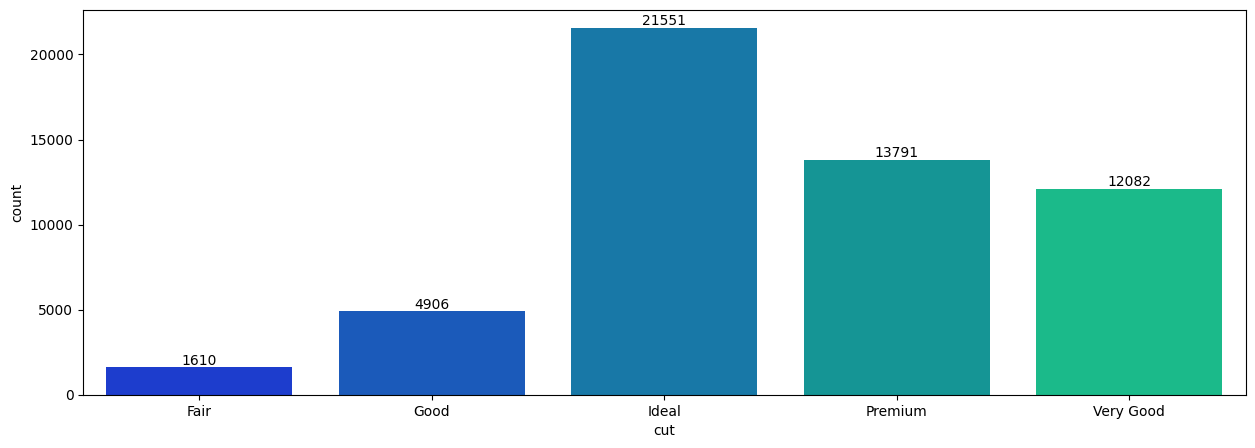

In [15]:
#Build barplot for DELINQ

plt.figure(figsize=(15,5))
ax = sns.countplot(x=data["cut"],palette='winter')
#perc_on_bar(ax,data["cut"])
for container in ax.containers:
    ax.bar_label(container)

**Insights**
- 40% of the cuts are the Ideal brand, followed by Premium.

#### **Note:** As done above, analyze Histogram and Boxplot for other variables.

C:\Users\adann\AppData\Local\Temp\ipykernel_17716\3538385892.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=data["color"],palette='winter')


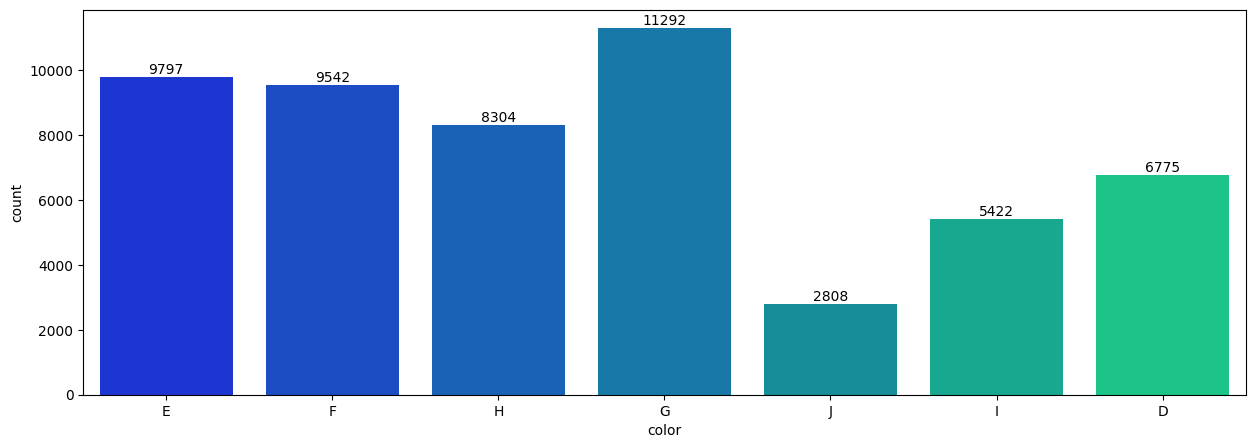

In [16]:
#Build barplot for NINQ #CLAGE did not display correctly

plt.figure(figsize=(15,5))
ax = sns.countplot(x=data["color"],palette='winter')
for container in ax.containers:
    ax.bar_label(container)

**Insights**
- The preferred color based on the distribution is color G.
- This is followed by color E then F.

C:\Users\adann\AppData\Local\Temp\ipykernel_17716\3489206348.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=data["clarity"],palette='winter')


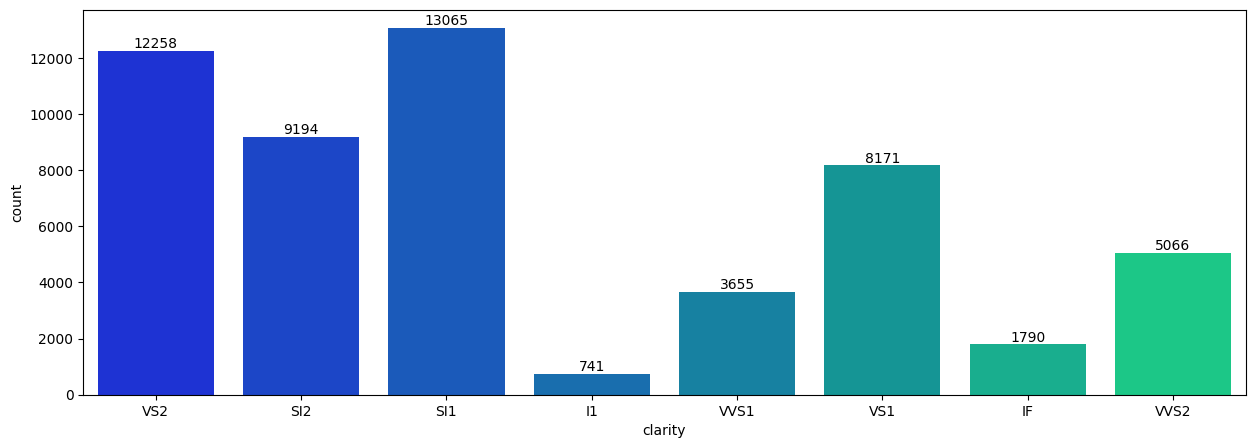

In [17]:
#Build barplot for CLNO

plt.figure(figsize=(15,5))
ax = sns.countplot(x=data["clarity"],palette='winter')
for container in ax.containers:
    ax.bar_label(container)

**Insights**
- Sl1 and VS2 are the most sold purity level.

## **Bivariate Analysis**

### **Bivariate Analysis: Continuous and Categorical Variables**

#### Analyze BAD vs Loan

C:\Users\adann\AppData\Local\Temp\ipykernel_8460\2097004802.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data["price"],y=data['clarity'],palette="PuBu")


<Axes: xlabel='price', ylabel='clarity'>

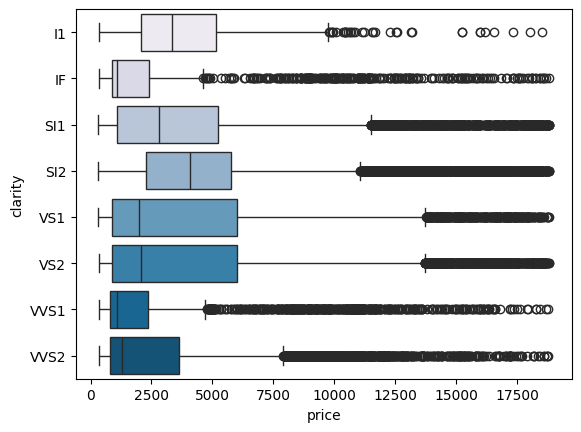

In [30]:
sns.boxplot(x=data["price"],y=data['clarity'],palette="PuBu")

**Insights**
- The price is not determined by clarity.
- Each clarity can have a high-ranged price.

#### 

#### **Note:** As shown above, perform Bi-Variate Analysis on different pair of Categorical and continuous variables

**Insights**
- There is a bigger range of 50% of the people that purchase the Premium brand which has a much higher outlier price compared to the other cuts...

### **Bivariate Analysis: Two Continuous Variables**

In [ ]:
sns.scatterplot(x = data["price"], y = data['carat'],palette="PuBu")
#sns.scatterplot(x = 'Item_Visibility', y = 'Item_Outlet_Sales', data = train_df, ax = axes[1]);

**Observation**
- The scatterplot shows better separation of the outlier values for both the price and carats.

C:\Users\adann\AppData\Local\Temp\ipykernel_14216\2379685154.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x = data["table"], y = data['depth'],palette="PuBu")


<Axes: xlabel='table', ylabel='depth'>

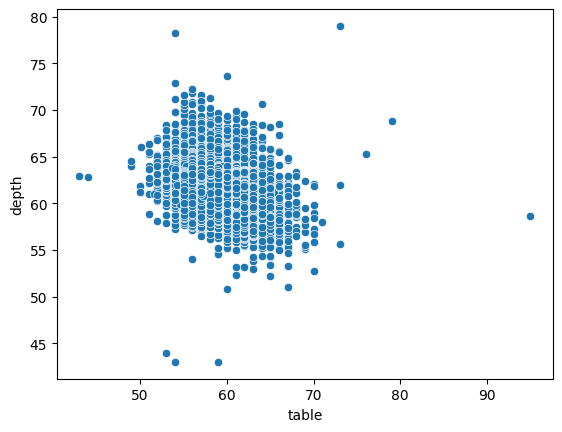

In [8]:
sns.scatterplot(x = data["table"], y = data['depth'],palette="PuBu")

C:\Users\adann\AppData\Local\Temp\ipykernel_14216\530304565.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x = data["price"], y = data['depth'],palette="PuBu")


<Axes: xlabel='price', ylabel='depth'>

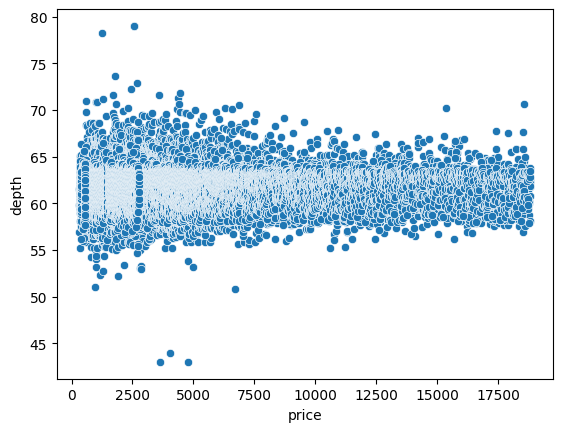

In [16]:
#Price and depth are slightly CORRELATED
sns.scatterplot(x = data["price"], y = data['depth'],palette="PuBu")

**Insights: _____**

C:\Users\adann\AppData\Local\Temp\ipykernel_8460\22036741.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x = data["price"], y = data['clarity'],palette="PuBu")


<Axes: xlabel='price', ylabel='clarity'>

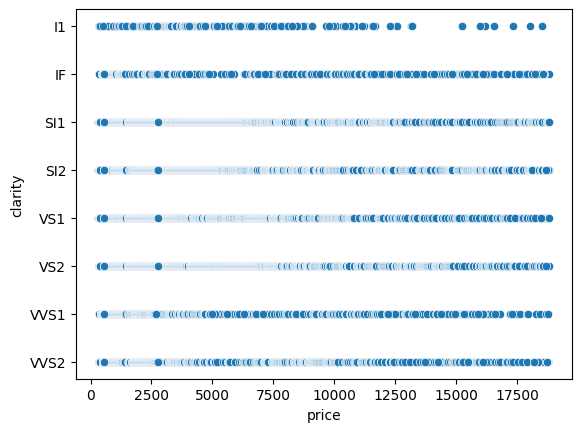

In [34]:
sns.scatterplot(x = data["price"], y = data['clarity'],palette="PuBu")

In [ ]:
#The plots below is to view more than 2 variables..

<Axes: xlabel='table', ylabel='depth'>

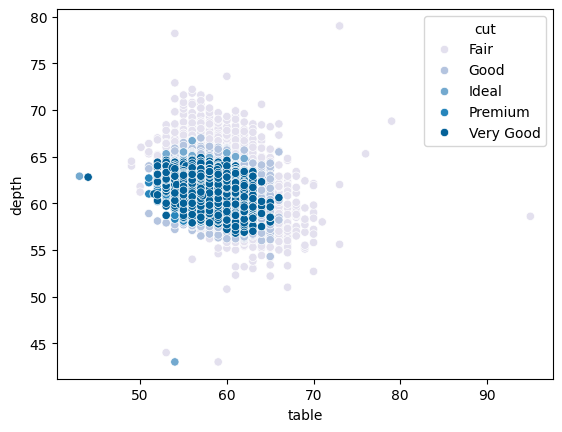

In [23]:
sns.scatterplot(data = data, x = "table", y = 'depth', hue = 'cut', palette="PuBu")

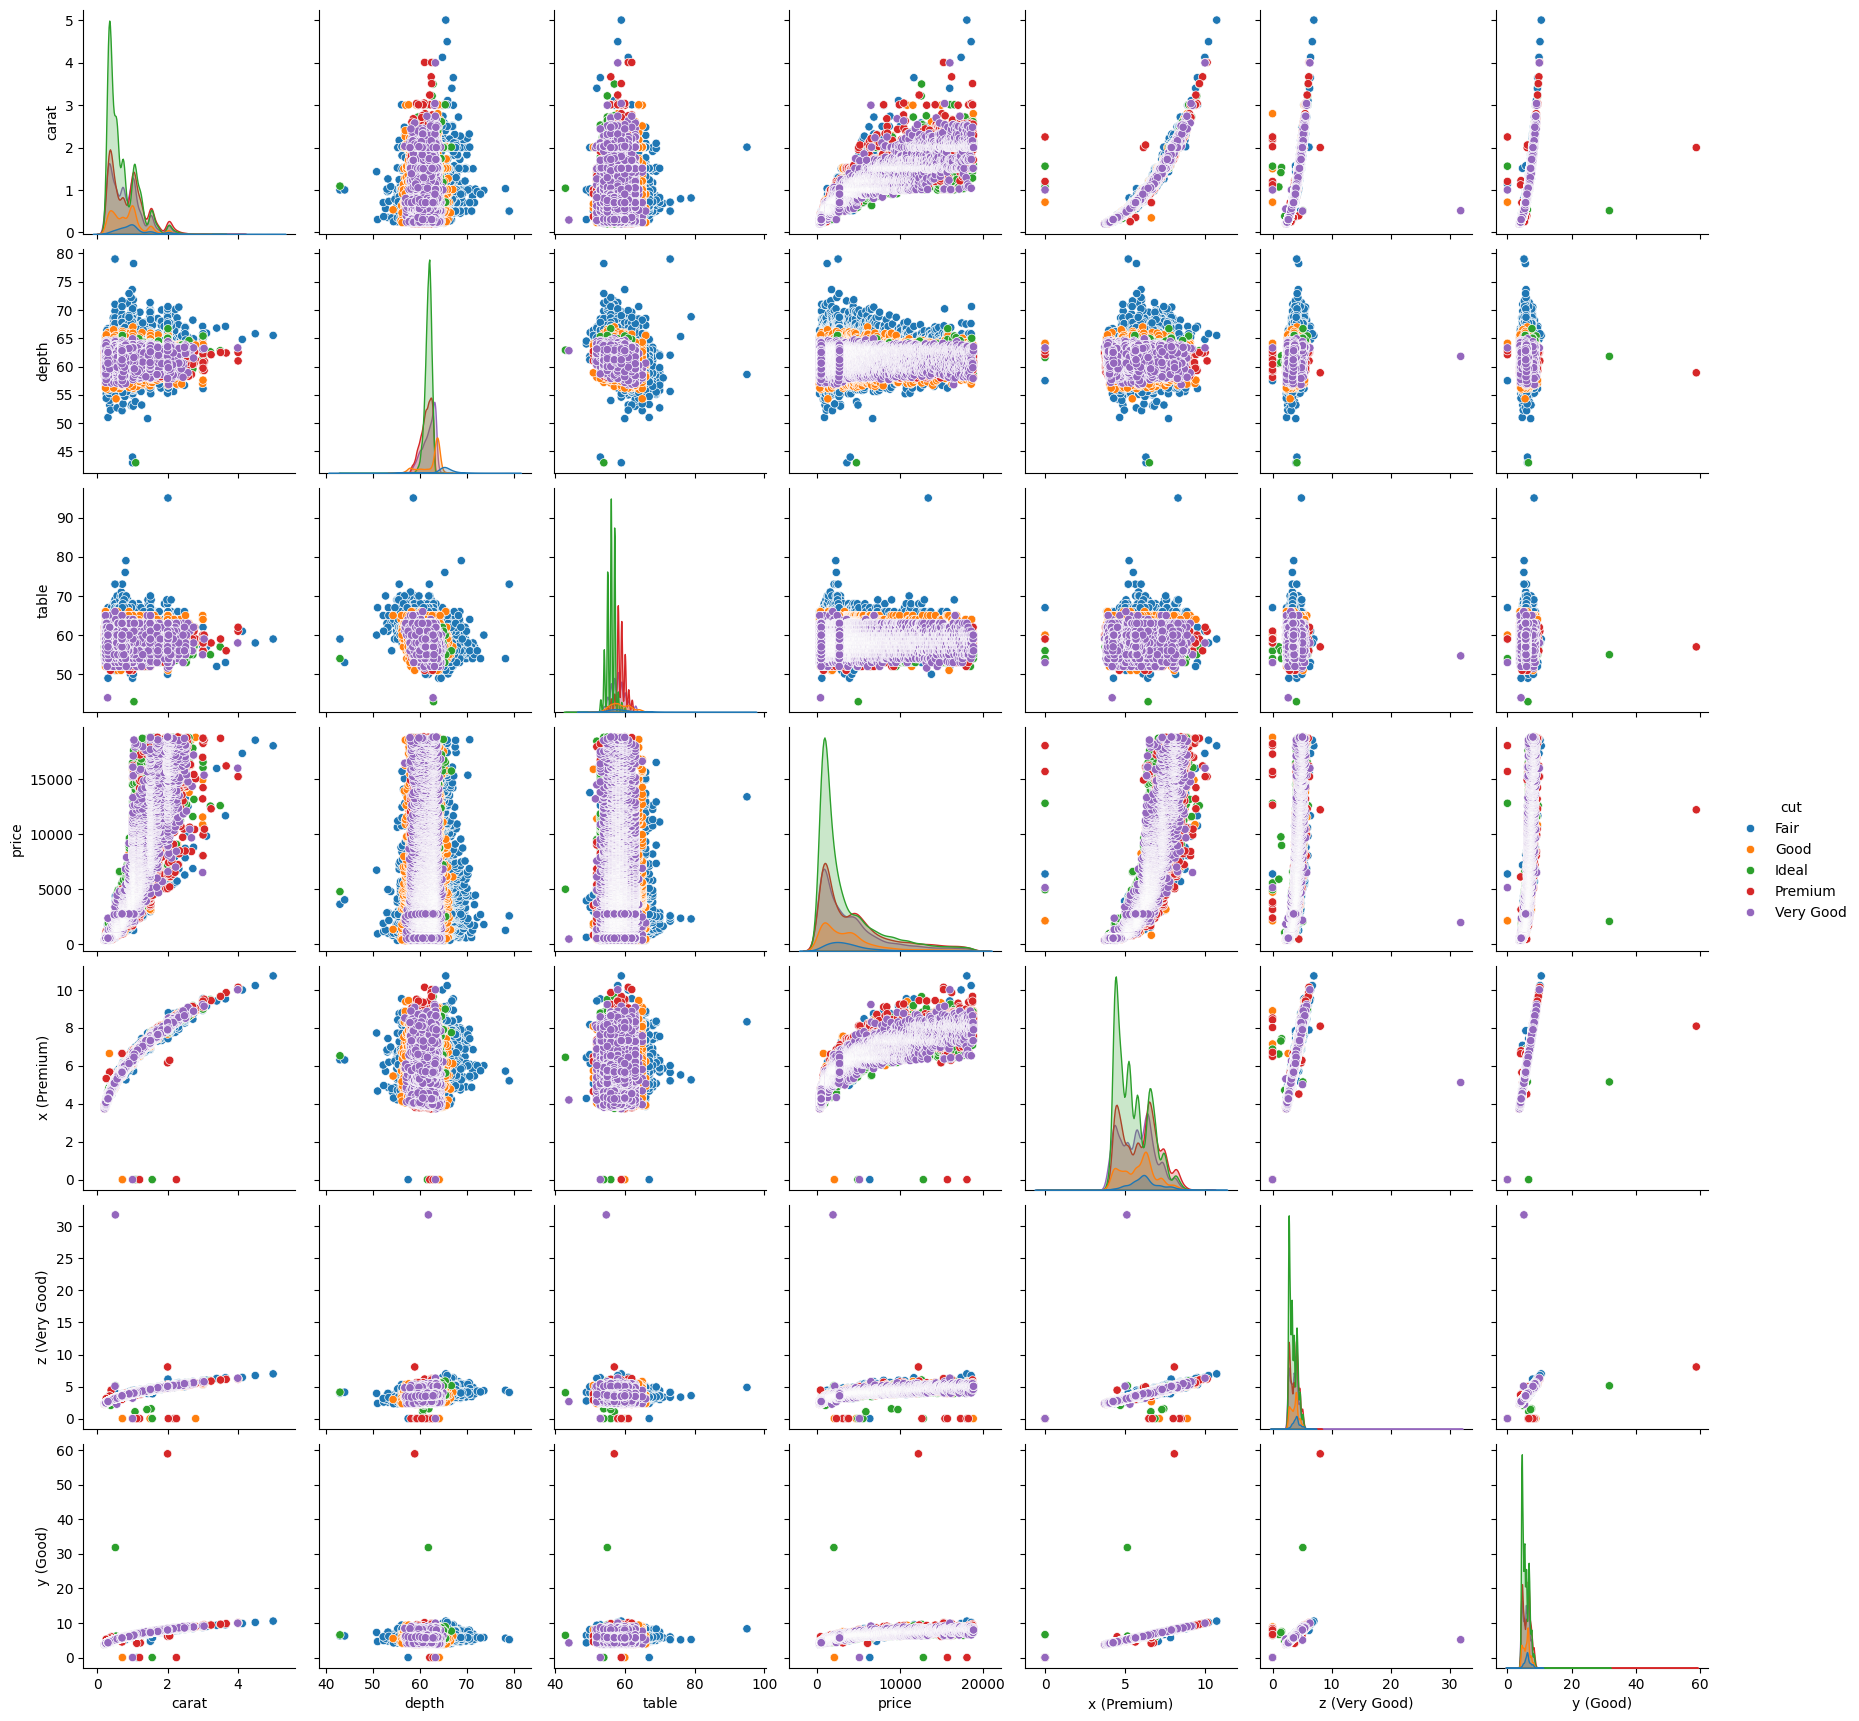

In [24]:
# Pair plot with hue
#sns.pairplot(data, hue = 'cut')

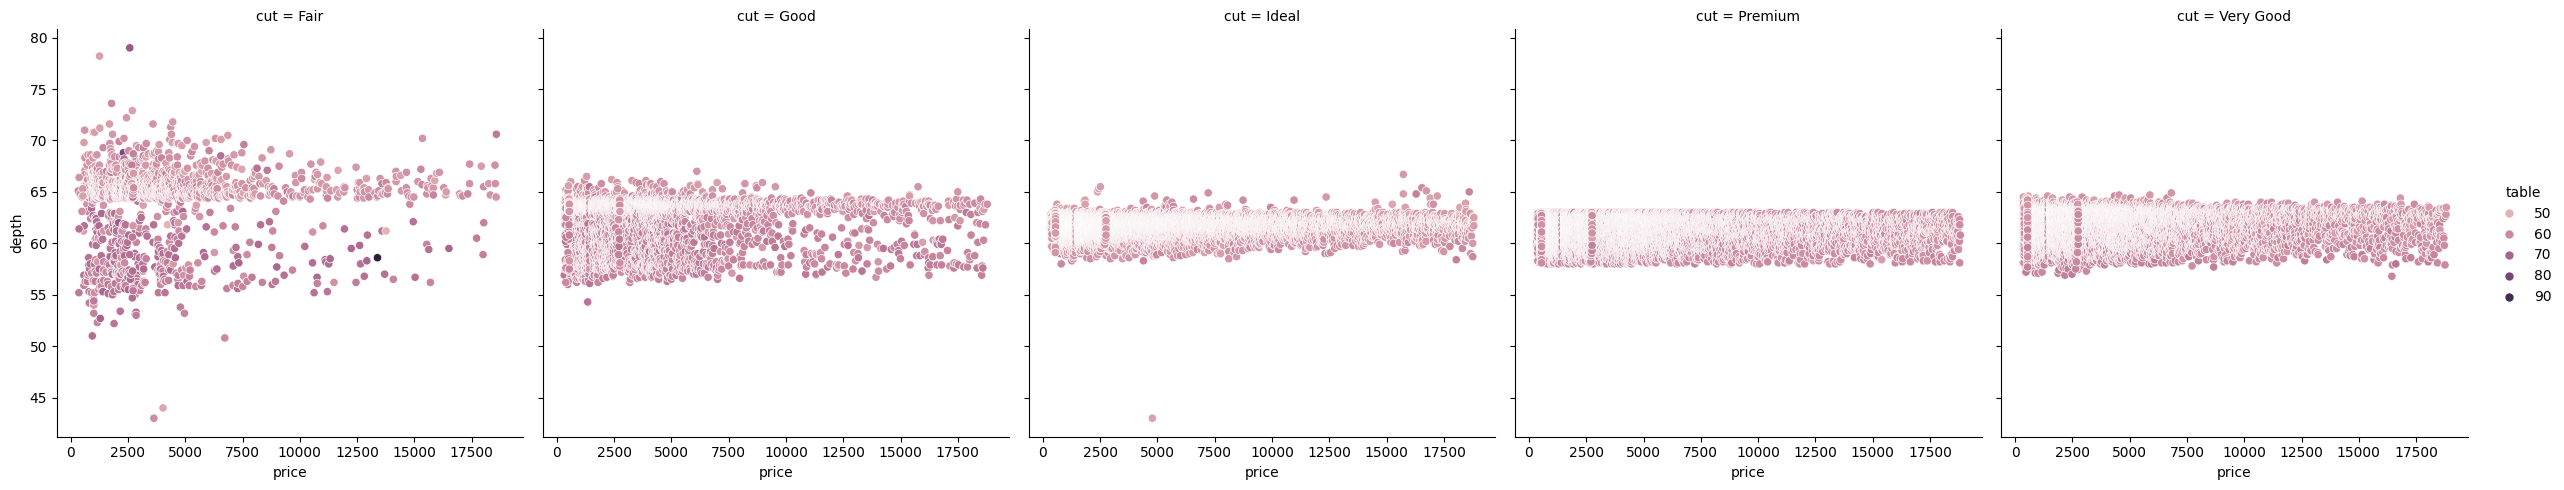

In [36]:
#datachart = data.groupby(['depth', 'table', 'cut', 'price'])
#sns.boxplot(datachart)

#Use relplot
sns.relplot(data, x = 'price', y ='depth', hue='table', col='cut')

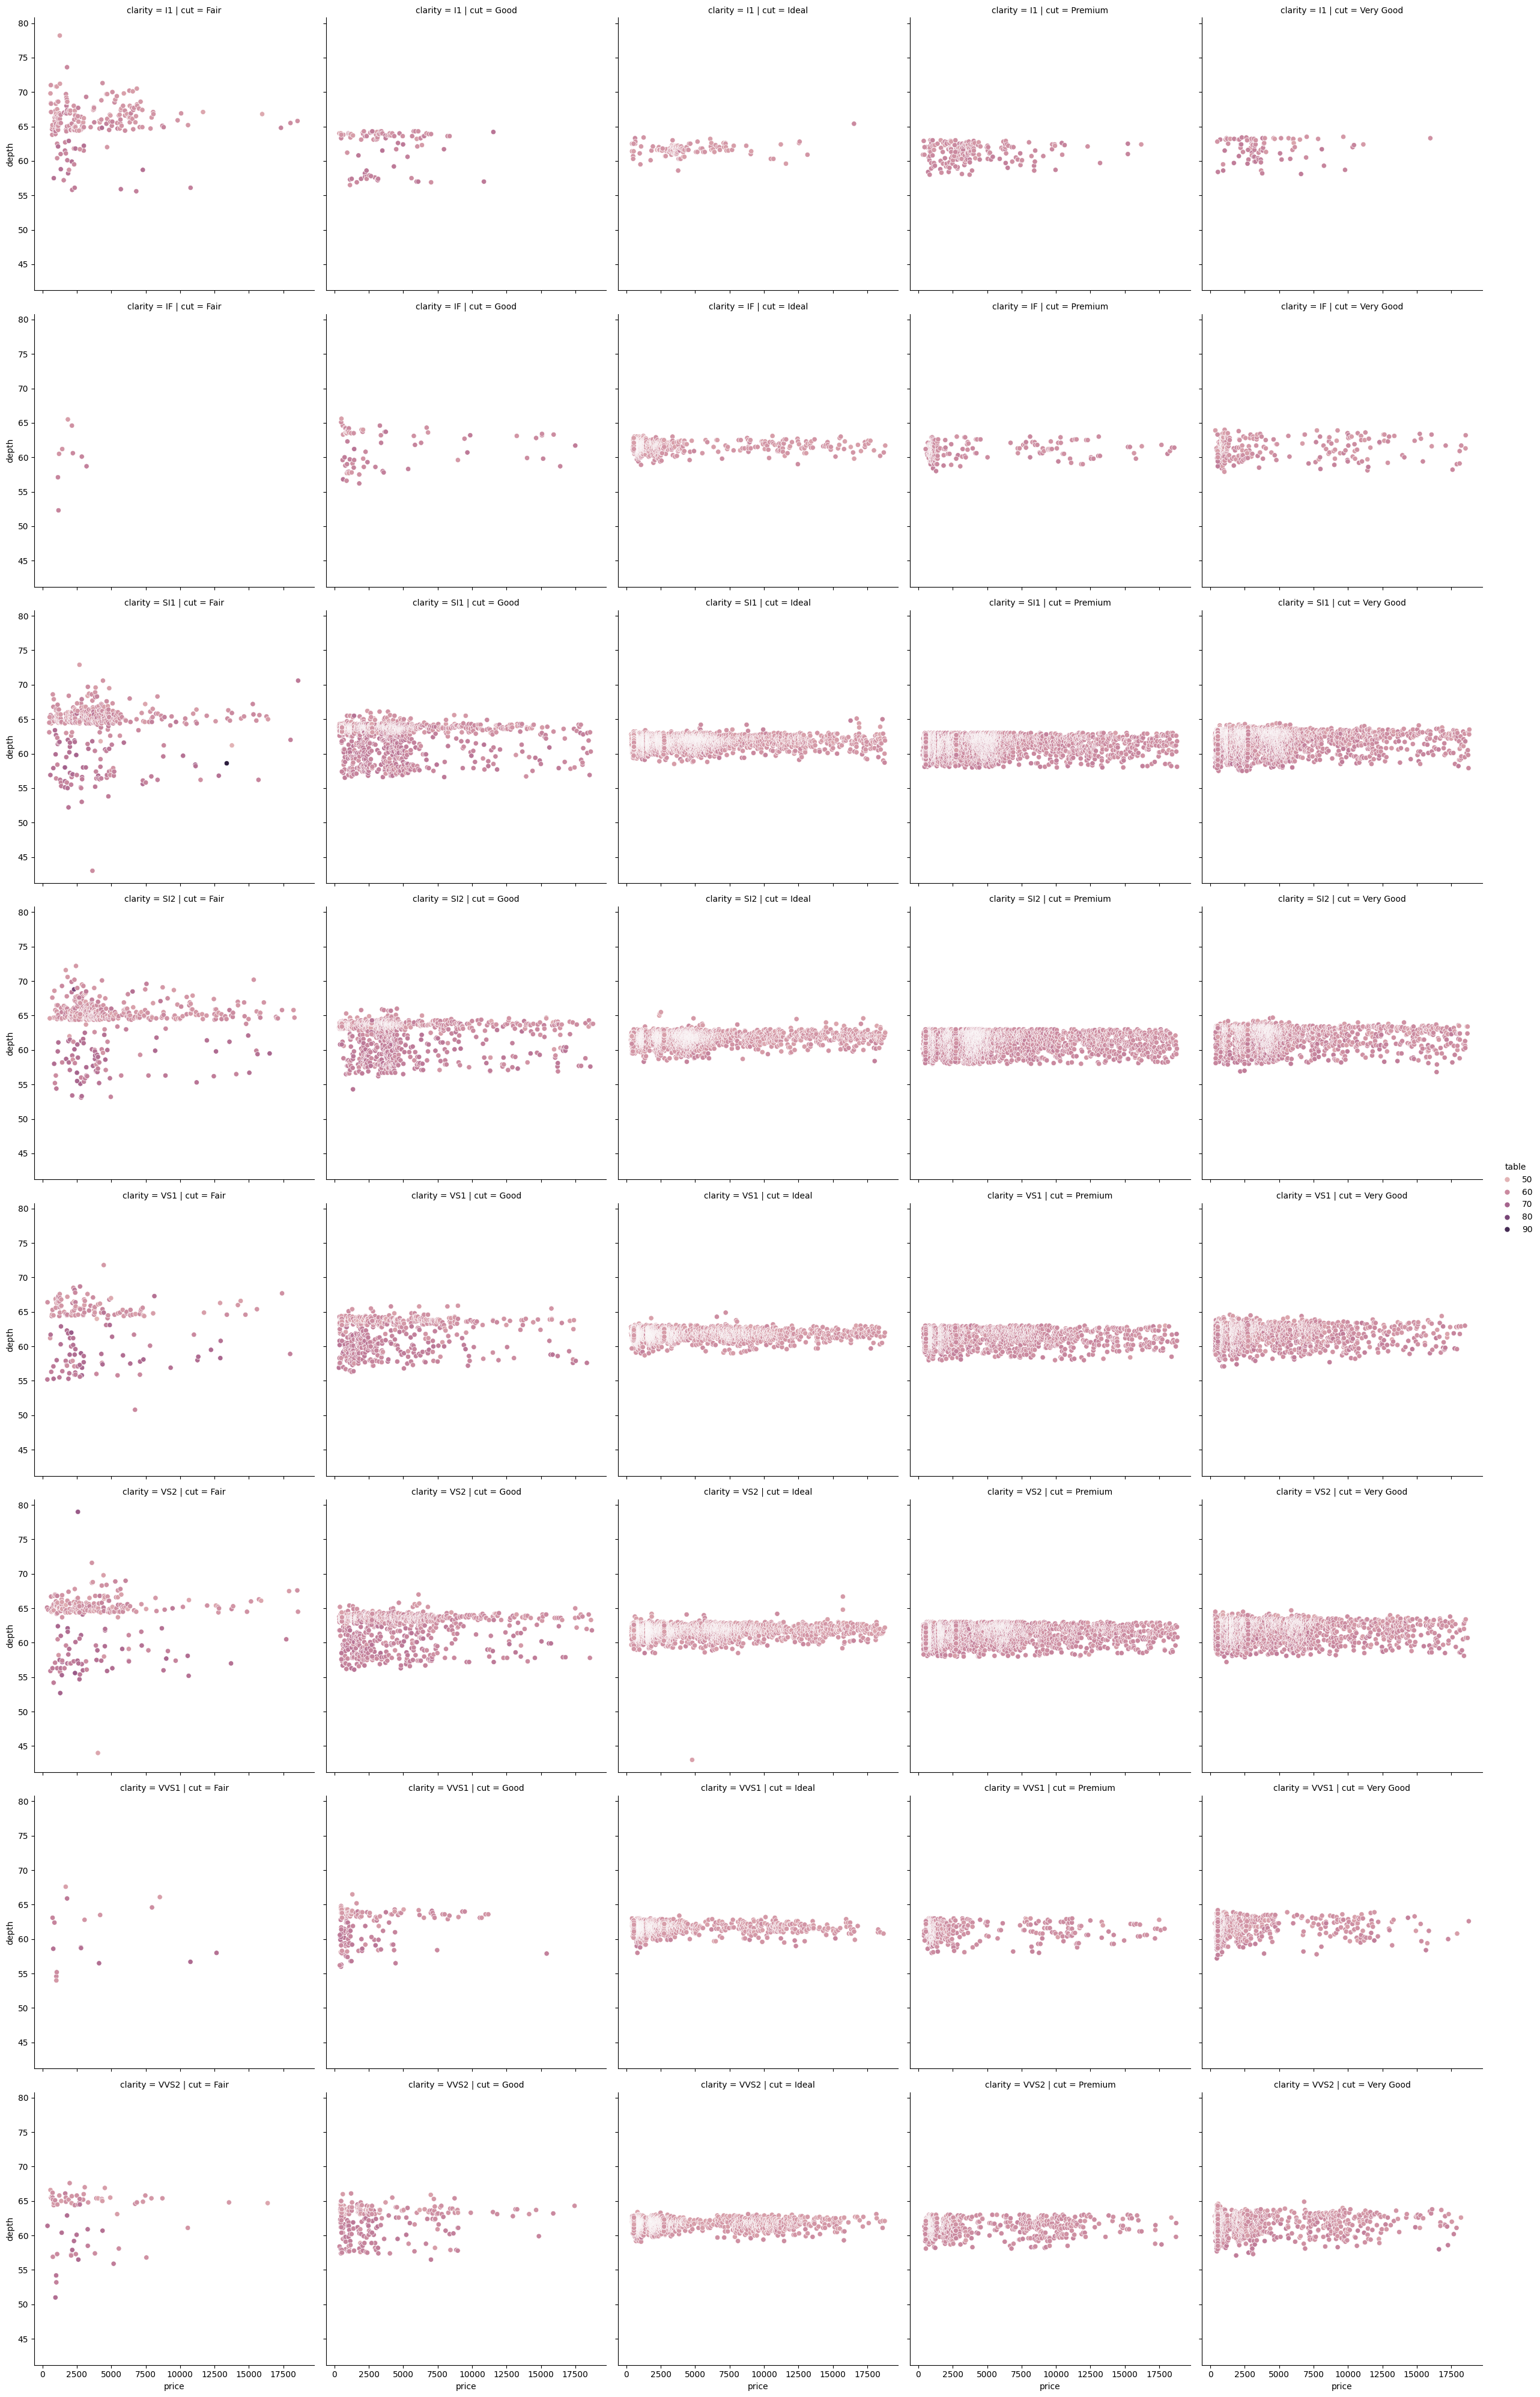

In [35]:
#datachart = data.groupby(['depth', 'table', 'cut', 'price'])
#sns.boxplot(datachart)

#Use relplot
sns.relplot(data, x = 'price', y ='depth', hue='table', col='cut', row='clarity')

**The stacked bar chart (aka stacked bar graph)** extends the standard bar chart from looking at numeric values across one categorical variable to two.

### **Multivariate Analysis**

In [151]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   cut            53940 non-null  object 
 1   color          53940 non-null  object 
 2   clarity        53940 non-null  object 
 3   carat          53940 non-null  float64
 4   depth          53940 non-null  float64
 5   table          53940 non-null  float64
 6   x_(Premium)    53940 non-null  float64
 7   z_(Very Good)  53940 non-null  float64
 8   y_(Good)       53940 non-null  float64
 9   price          53940 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


#### Add hist and boxplot chart for all Numerical Variables

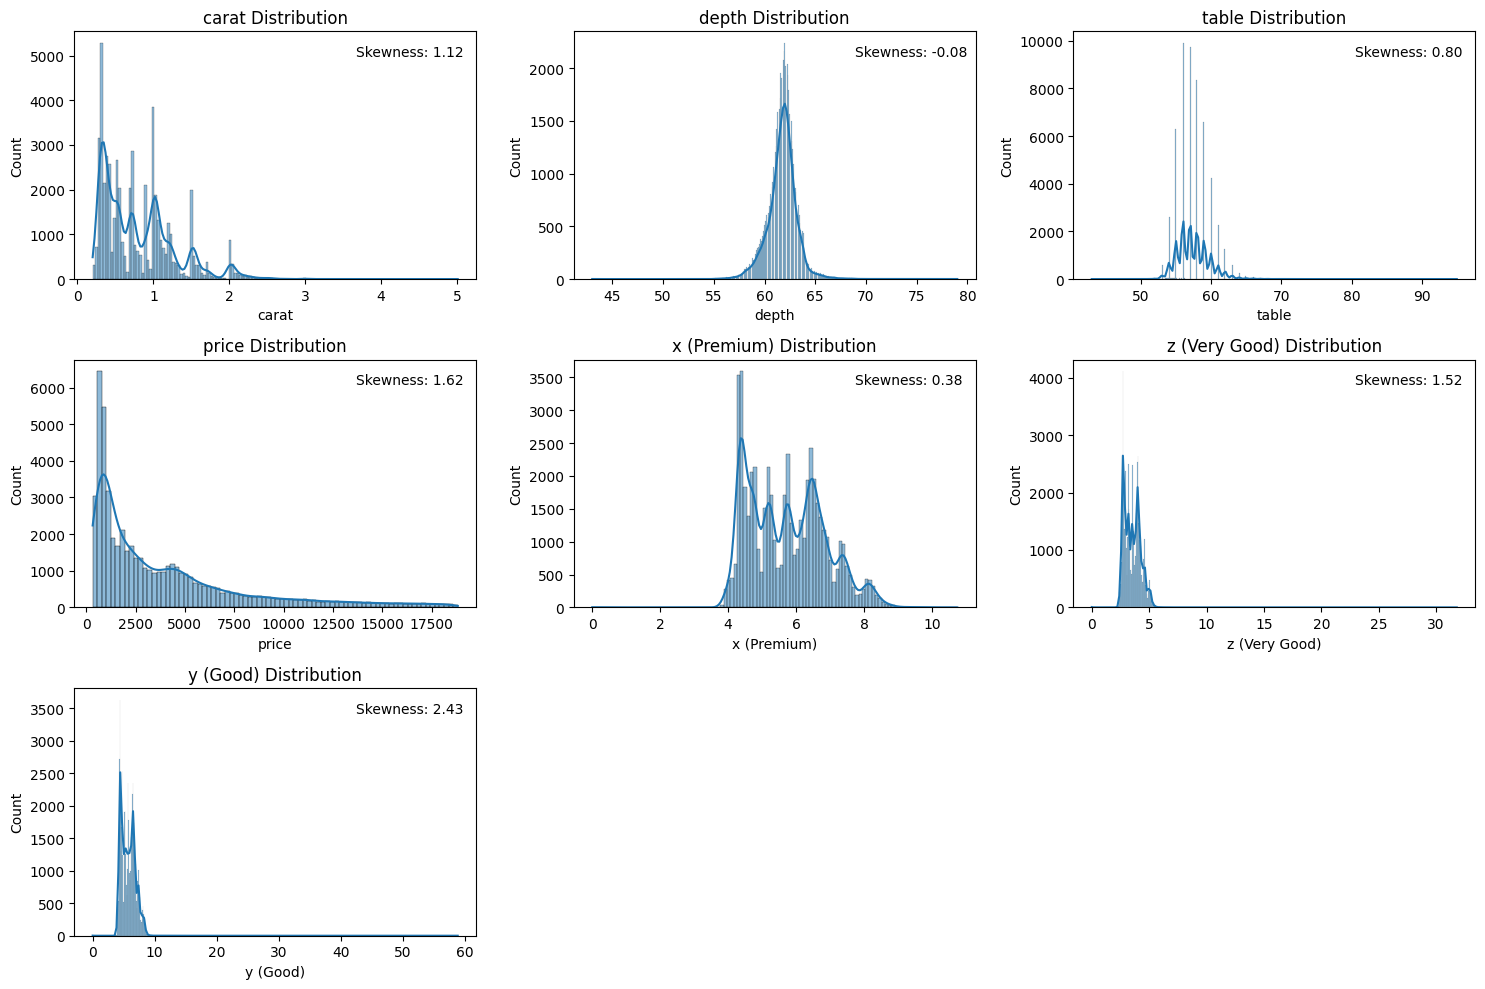

In [47]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features[:7], 1):
    plt.subplot(3, 3, i)
    sns.histplot(data[feature], kde=True)
    plt.title(f'{feature} Distribution')
    skewness = stats.skew(data[feature].dropna())
    plt.text(0.7, 0.9, f'Skewness: {skewness:.2f}', transform=plt.gca().transAxes)
plt.tight_layout()
plt.show()

#### Histplot after removal of outliers

In [18]:
data_cln = data.copy() #make a copy of the current dataframe
data_clncap = data.copy() #to observer capped plots as described in the video
#numerical_features

In [19]:
 Q1= np.percentile(data[numerical_features], 25) # 25th quantile
 Q3= np.percentile(data[numerical_features], 75)  # 75th quantile
 IQR=Q3 - Q1   # IQR Range
 Lower_Whisker = Q1 - (1.5 * IQR)  #define lower whisker
 Upper_Whisker = Q3 + (1.5 * IQR)  # define upper Whisker
 data_cln[numerical_features] = np.clip(data[numerical_features], Lower_Whisker, Upper_Whisker) # all the values samller than Lower_Whisker will be assigned value of Lower_whisker 
                                                            # and all the values above upper_whishker will be assigned value of upper_Whisker 
 #data_clncap.loc[data_clncap['carat'] > Upper_Whisker, 'carat'] = Upper_Whisker
 #data_clncap.loc[data_clncap[numerical_features] < Lower_Whisker, numerical_features] = Lower_Whisker
#data_cln.loc[data_cln[co

C:\Users\adann\AppData\Local\Temp\ipykernel_8460\3885942951.py:8: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = stats.skew(data_clncap[feature].dropna())


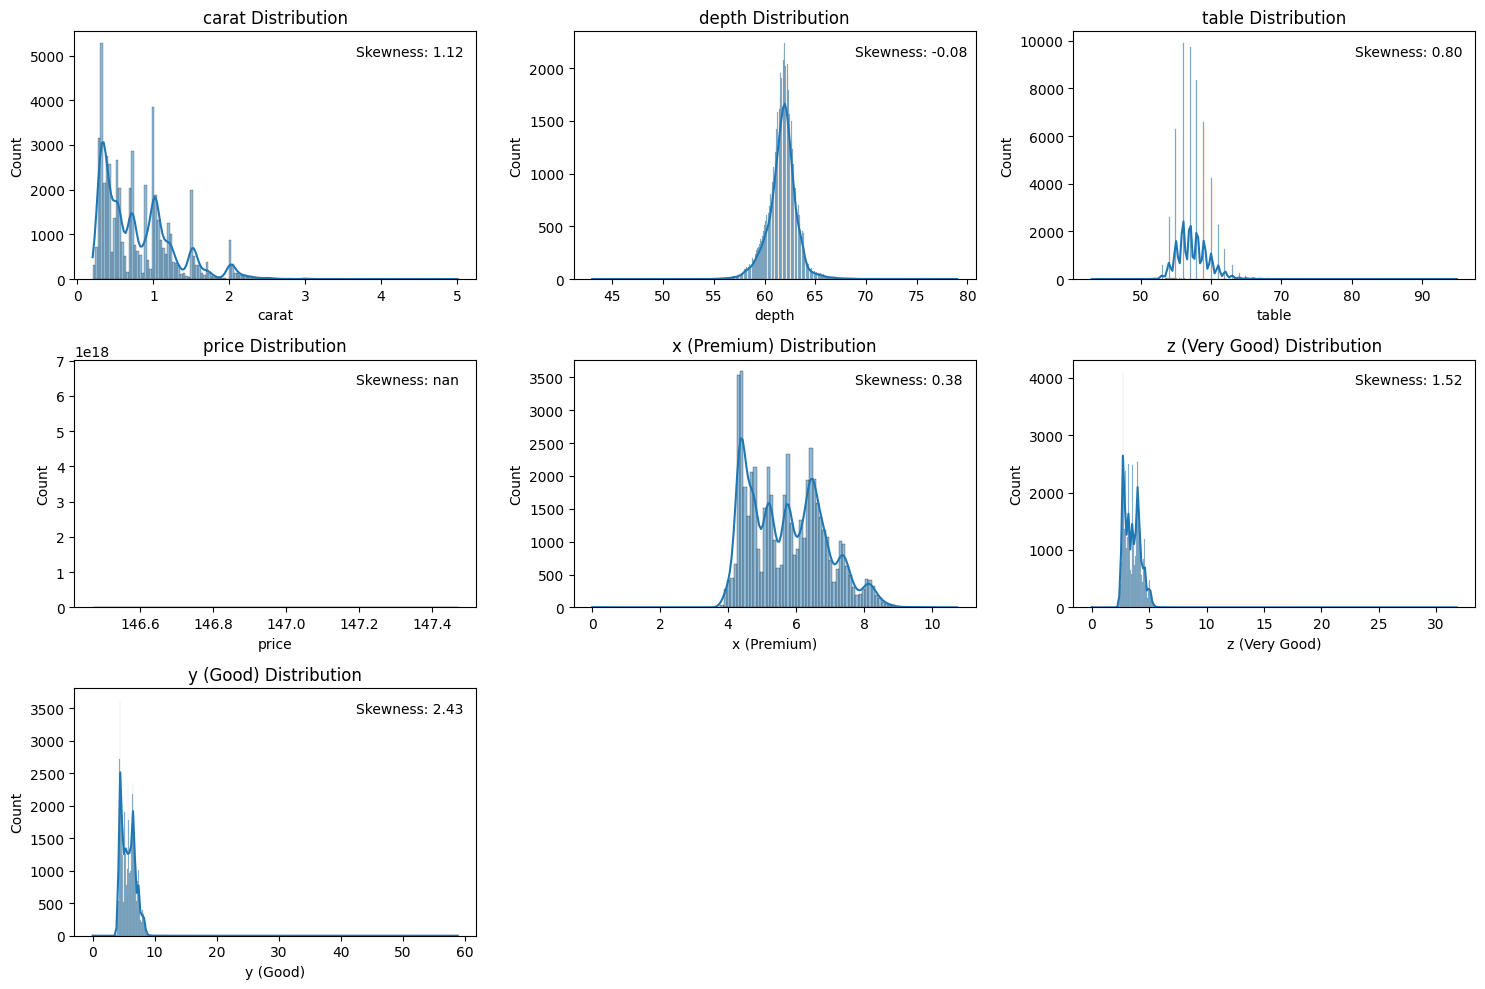

In [91]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features[:7], 1):
    data_clncap.loc[data_clncap[feature] > Upper_Whisker, feature] = Upper_Whisker
    data_clncap.loc[data_clncap[feature] < Lower_Whisker, feature] = Lower_Whisker
    plt.subplot(3, 3, i)
    sns.histplot(data_clncap[feature], kde=True)
    plt.title(f'{feature} Distribution')
    skewness = stats.skew(data_clncap[feature].dropna())
    plt.text(0.7, 0.9, f'Skewness: {skewness:.2f}', transform=plt.gca().transAxes)
plt.tight_layout()
plt.show()

C:\Users\adann\AppData\Local\Temp\ipykernel_8460\3817525405.py:6: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = stats.skew(data_cln[feature].dropna())


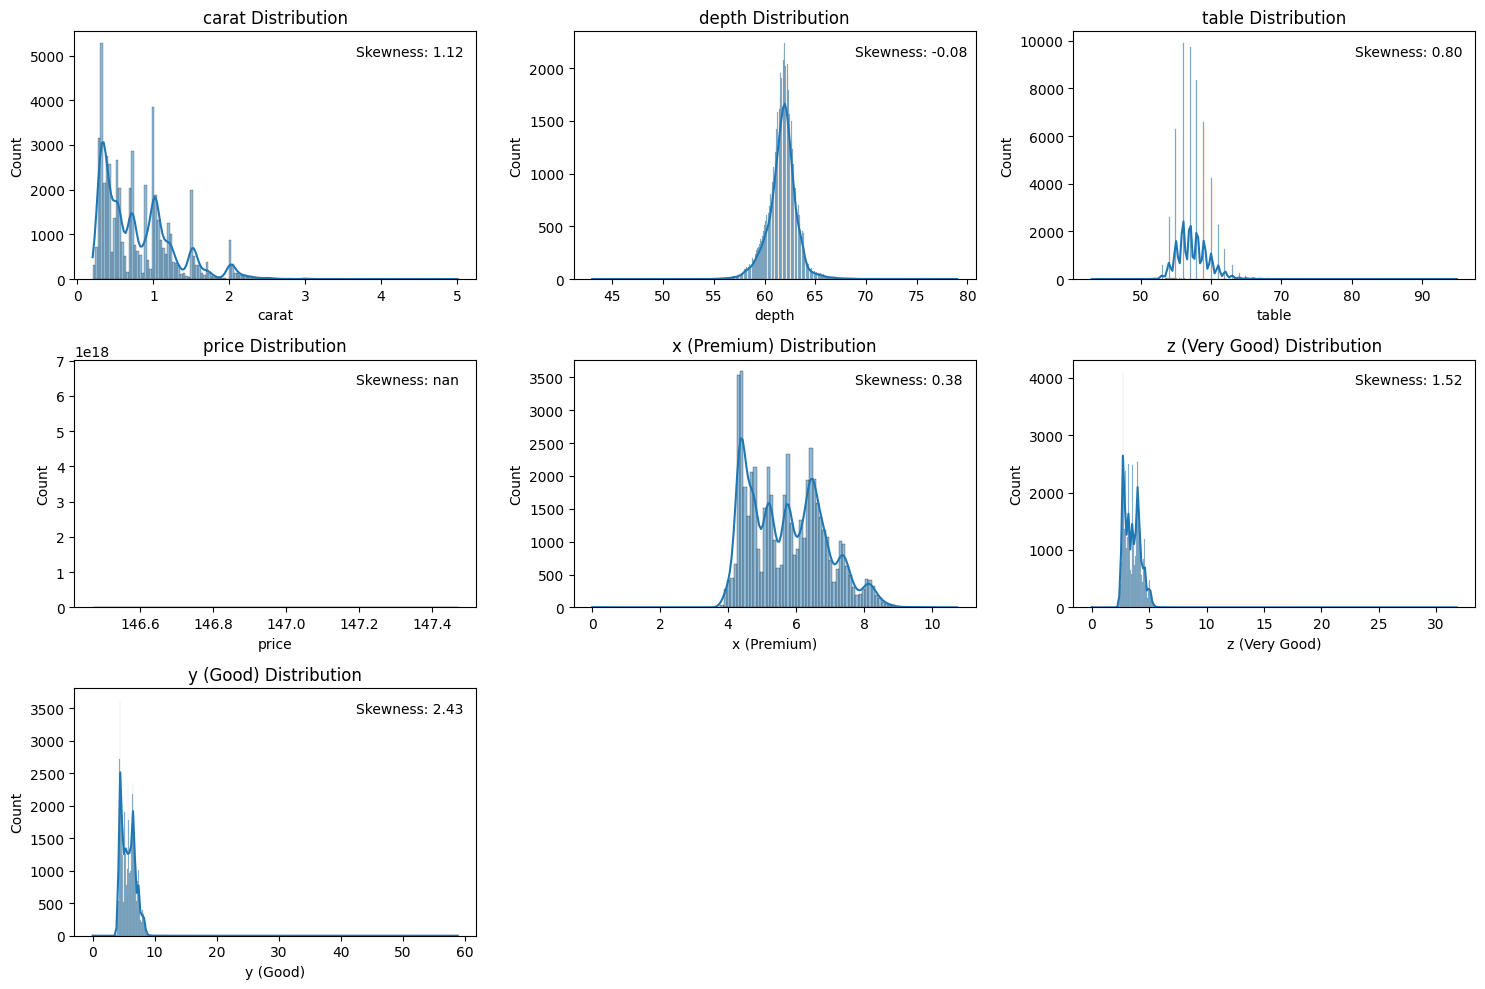

In [92]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features[:7], 1):
    plt.subplot(3, 3, i)
    sns.histplot(data_cln[feature], kde=True)
    plt.title(f'{feature} Distribution')
    skewness = stats.skew(data_cln[feature].dropna())
    plt.text(0.7, 0.9, f'Skewness: {skewness:.2f}', transform=plt.gca().transAxes)
plt.tight_layout()
plt.show()

In [386]:
##Create Label Encoder for ordinal categores -cut, color and clarity
#data_encoded2 = data.copy()
#le = LabelEncoder()
##----------------cut-------
#cut_order = ["Fair", "Good", "Very Good", "Ideal", "Premium"]
#data_encoded2['cut_label'] = pd.Categorical(
#    data_encoded2['cut'],
#    categories = cut_order,
#    ordered = True).codes
##print
#data_encoded2[['cut', 'cut_label']]
#print(data_encoded2['cut_label'].value_counts(dropna = False))

##----------------clarity category-------
##Where is "IF" ranked?? NOT mentioned in description..
#clarity_order = ["I1", "IF", "SI1", "SI2","VS1", "VS2", "VVS1", "VVS2"] #SI2 SI1 VS1 VS2 VVS2 VVS1 and I1
#data_encoded2['clarity_label'] = pd.Categorical(
#    data_encoded2['clarity'],
#    categories = clarity_order,
#    ordered = True).codes
##print
#data_encoded2[['clarity', 'clarity_label']]
#print(data_encoded2['clarity_label'].value_counts(dropna = False))

##----------------color category-------
#color_order = ["J", "I", "E", "F","G", "H", "D"]
#data_encoded2['color_label'] = pd.Categorical(
#    data_encoded2['color'],
#    categories = color_order,
#    ordered = True).codes
##print
#data_encoded2[['color', 'color_label']]
#print(data_encoded2['color_label'].value_counts(dropna = False))

cut_label
3    21551
4    13791
2    12082
1     4906
0     1610
Name: count, dtype: int64
clarity_label
2    13065
5    12258
3     9194
4     8171
7     5066
6     3655
1     1790
0      741
Name: count, dtype: int64
color_label
4    11292
2     9797
3     9542
5     8304
6     6775
1     5422
0     2808
Name: count, dtype: int64


In [175]:
#Remove duplicates
data.duplicated().sum()

146

In [176]:
#There are 146 duplicate rows that need to be removed
data.drop_duplicates(inplace=True)
data.reset_index(drop=True, inplace=True)

In [177]:
#Create Label Encoder for ordinal categores -cut, color and clarity
data_encoded2 = data.copy()
#ordenc = OrdinalEncoder()
#----------------cut-------
cut_order = ["Fair", "Good", "Very Good", "Premium", "Ideal"]

data_encoded2['clarity_other'] = data_encoded2['clarity']
data_encoded2['clarity_other'] = ["Other" if x =="I1" or x =="IF" else x for x in data_encoded2['clarity_other']] #list comprehension

print(data_encoded2['clarity_other'].value_counts(dropna = False))
#print(data_encoded2['clarity'].value_counts(dropna = False))
clarity_other_order = ["Other", "SI1", "SI2","VS2", "VS1", "VVS2", "VVS1"] #SI2 SI1 VS1 VS2 VVS2 VVS1 and I1

color_order = ["J", "I","H", "G","F", "E", "D"] #["J", "I", "E", "F","G", "H", "D"]
ordenc = OrdinalEncoder(categories = [cut_order, color_order, clarity_other_order])
cat_cols = ['cut', 'color', 'clarity_other'] 
#data_encoded2['cut', 'color', 'clarity_other'] = ordenc.fit_transform(data_encoded2[['cut', 'color', 'clarity_other']])
data_encoded2[cat_cols] = ordenc.fit_transform(data_encoded2[cat_cols])
#ordenc.categories_
data_encoded2.head()

clarity_other
SI1      13032
VS2      12229
SI2       9150
VS1       8156
VVS2      5056
VVS1      3647
Other     2524
Name: count, dtype: int64


cut  color clarity  carat  depth  table  x_(Premium)  z_(Very Good)  \
0  0.0    5.0     VS2   0.22   65.1   61.0         3.87           2.49   
1  0.0    5.0     SI2   0.86   55.1   69.0         6.45           3.52   
2  0.0    4.0     SI2   0.96   66.3   62.0         6.27           4.07   
3  0.0    4.0     VS2   0.70   64.5   57.0         5.57           3.58   
4  0.0    4.0     VS2   0.70   65.3   55.0         5.63           3.66   

   y_(Good)  price  clarity_other  
0      3.78    337            3.0  
1      6.33   2757            2.0  
2      5.95   2759            2.0  
3      5.53   2762            3.0  
4      5.58   2762            3.0

In [178]:
#Next is to drop cut, color and clarity columns..
#data_encoded2.drop(['cut'], axis = 1, inplace = True) #data.drop(['cut', 'color', 'clarity'], axis = 1, inplace = True)
#data_encoded2.drop(['color'], axis = 1, inplace = True)
data_encoded2.drop(['clarity'], axis = 1, inplace = True)

data_encoded2.head()
#print(data.dtypes)
#data.info()

cut  color  carat  depth  table  x_(Premium)  z_(Very Good)  y_(Good)  \
0  0.0    5.0   0.22   65.1   61.0         3.87           2.49      3.78   
1  0.0    5.0   0.86   55.1   69.0         6.45           3.52      6.33   
2  0.0    4.0   0.96   66.3   62.0         6.27           4.07      5.95   
3  0.0    4.0   0.70   64.5   57.0         5.57           3.58      5.53   
4  0.0    4.0   0.70   65.3   55.0         5.63           3.66      5.58   

   price  clarity_other  
0    337            3.0  
1   2757            2.0  
2   2759            2.0  
3   2762            3.0  
4   2762            3.0

#### Analyze Correlation Heatmap for Numerical Variables

In [37]:
data_encoded2.head()

cut  color  carat  depth  table  x_(Premium)  z_(Very Good)  y_(Good)  \
0  0.0    5.0   0.22   65.1   61.0         3.87           2.49      3.78   
1  0.0    5.0   0.86   55.1   69.0         6.45           3.52      6.33   
2  0.0    4.0   0.96   66.3   62.0         6.27           4.07      5.95   
3  0.0    4.0   0.70   64.5   57.0         5.57           3.58      5.53   
4  0.0    4.0   0.70   65.3   55.0         5.63           3.66      5.58   

   price  clarity_other  
0    337            4.0  
1   2757            2.0  
2   2759            2.0  
3   2762            4.0  
4   2762            4.0

In [179]:
#Reorder the columns..
#data_encoded2old = data_encoded2[['cut_label', 'color_label', 'clarity_label', 'carat', 'depth', 'table', 'x_(Premium)', 'z_(Very Good)', 'y_(Good)', 'price',]]
data_encoded2 = data_encoded2[['cut', 'color', 'clarity_other', 'carat', 'depth', 'table', 'x_(Premium)', 'z_(Very Good)', 'y_(Good)', 'price',]]

#data_encoded2.head()

#Try combining the x, z and y columns
##Step 1 is with MULTIPLICATION------

df = data_encoded2.copy()
df['volumedim_xyz'] = data_encoded2['x_(Premium)'] * data_encoded2['z_(Very Good)'] * data_encoded2['y_(Good)'] #for volume category 
data_encoded2xyz = pd.concat([df['volumedim_xyz'], data_encoded2], axis = 1)
#data_encoded2xyz.head()
#data_encoded2 = pd.concat([clarity_label, data], axis = 1)

##Next is to drop x_(Premium)', 'z_(Very Good)', 'y_(Good) columns..
data_encoded2xyz.drop(['x_(Premium)'], axis = 1, inplace = True) 
data_encoded2xyz.drop(['z_(Very Good)'], axis = 1, inplace = True)
data_encoded2xyz.drop(['y_(Good)'], axis = 1, inplace = True)
data_encoded2xyz.head()


volumedim_xyz  cut  color  clarity_other  carat  depth  table  price
0      36.425214  0.0    5.0            3.0   0.22   65.1   61.0    337
1     143.716320  0.0    5.0            2.0   0.86   55.1   69.0   2757
2     151.837455  0.0    4.0            2.0   0.96   66.3   62.0   2759
3     110.271518  0.0    4.0            3.0   0.70   64.5   57.0   2762
4     114.980364  0.0    4.0            3.0   0.70   65.3   55.0   2762

In [180]:
data_encoded2xyz.describe(include = 'number').T

count         mean          std    min         25%  \
volumedim_xyz  53794.0   129.826975    78.160819    0.0   65.190168   
cut            53794.0     2.904134     1.116098    0.0    2.000000   
color          53794.0     3.406086     1.701117    0.0    2.000000   
clarity_other  53794.0     2.747611     1.623416    0.0    1.000000   
carat          53794.0     0.797780     0.473390    0.2    0.400000   
depth          53794.0    61.748080     1.429909   43.0   61.000000   
table          53794.0    57.458109     2.233679   43.0   56.000000   
price          53794.0  3933.065082  3988.114460  326.0  951.000000   

                      50%        75%          max  
volumedim_xyz   114.84018   170.8236   3840.59806  
cut               3.00000     4.0000      4.00000  
color             3.00000     5.0000      6.00000  
clarity_other     3.00000     4.0000      6.00000  
carat             0.70000     1.0400      5.01000  
depth            61.80000    62.5000     79.00000  
table            57.00000    59.0000     95.00000  
price          2401.00000  5326.7500  18823.00000

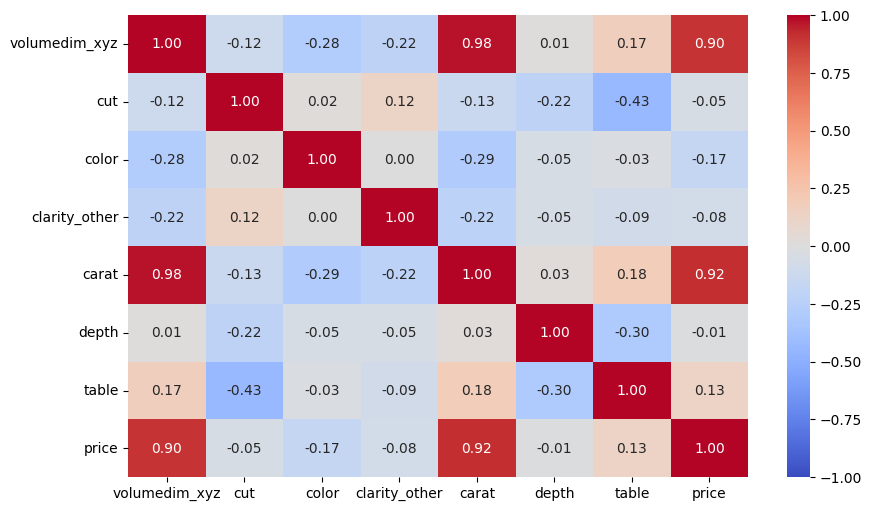

In [181]:
# Separating numerical variables
#numerical_col = data_enc.select_dtypes(include=np.number).columns.tolist()
#numerical_col = data_encoded2.select_dtypes(include=np.number).columns.tolist()
numerical_col = data_encoded2xyz.select_dtypes(include=np.number).columns.tolist()


#corr = data_enc[numerical_col].corr()
#corr = data_encoded2[numerical_col].corr()
corr = data_encoded2xyz[numerical_col].corr()
#corr = data_encoded2noxyz[numerical_col].corr()
corr
#print(corr)
# plot the heatmap

plt.figure(figsize=(10,6)) #(16,12))
sns.heatmap(corr,cmap='coolwarm',vmax=1,vmin=-1,
        annot = True,
        fmt=".2f",
        xticklabels=corr.columns,
        yticklabels=corr.columns);

In [54]:
corr

volumedim_xyz       cut     color  clarity_other     carat  \
volumedim_xyz       1.000000 -0.116803 -0.283789      -0.201951  0.976227   
cut                -0.116803  1.000000  0.020162       0.117239 -0.133376   
color              -0.283789  0.020162  1.000000       0.026350 -0.291019   
clarity_other      -0.201951  0.117239  0.026350       1.000000 -0.209143   
carat               0.976227 -0.133376 -0.291019      -0.209143  1.000000   
depth               0.008704 -0.217078 -0.047572      -0.048377  0.027861   
table               0.166813 -0.433700 -0.026102      -0.086399  0.181091   
price               0.902231 -0.052241 -0.171825      -0.072361  0.921548   

                  depth     table     price  
volumedim_xyz  0.008704  0.166813  0.902231  
cut           -0.217078 -0.433700 -0.052241  
color         -0.047572 -0.026102 -0.171825  
clarity_other -0.048377 -0.086399 -0.072361  
carat          0.027861  0.181091  0.921548  
depth          1.000000 -0.297669 -0.011048  
table         -0.297669  1.000000  0.126566  
price         -0.011048  0.126566  1.000000

<Axes: >

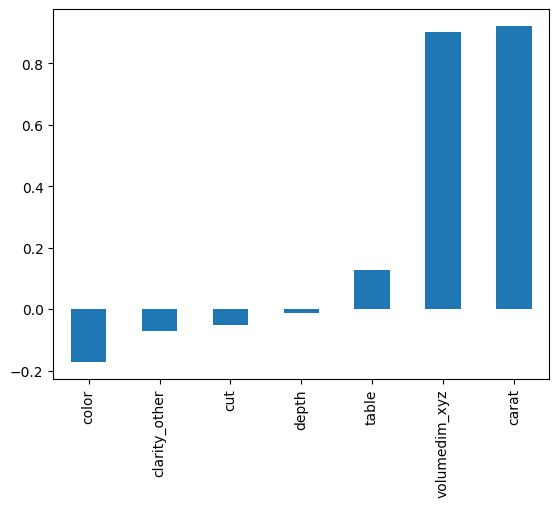

In [55]:
##Use barplot to further observe the correlation
data_encoded2xyz.corr()['price'].sort_values().drop('price').plot(kind ='bar')

### **Think about it**
- Are there missing values and outliers in the dataset? If yes, how can you treat them? 
- Can you think of different ways in which this can be done and when to treat these outliers or not?
- Can we create new features based on Missing values?

#### Treating Outliers

#### Filling missing values in numerical columns with median and mode in categorical variables

## **Important Insights from EDA**

What are the the most important observations and insights from the data based on the EDA performed?

## **Model Building - Approach**
1. Data preparation
2. Partition the data into train and test set
3. Fit on the train data
4. Tune the model and prune the tree, if required
5. Test the model on test set

#### Linear Regression

In [318]:
#Get the Input and Output Variables
#At this point, inspect and exclude variables like ids that have no corrlation/nothing to do with predicting the dependent variable.
#Check if distribution of the dependent variable is balanced - there is no prevalent class (applies more to Logistic Regrssion for Classification).
#X = data_encoded2xyz.iloc[:, :-1].values
#y = data_encoded2xyz.iloc[:, -1].values

X = data_encoded2xyz.drop(['price'], axis = 1)
y = data_encoded2xyz['price']

In [319]:
X.head()

volumedim_xyz  cut  color  clarity_other  carat  depth  table
0      36.425214  0.0    5.0            3.0   0.22   65.1   61.0
1     143.716320  0.0    5.0            2.0   0.86   55.1   69.0
2     151.837455  0.0    4.0            2.0   0.96   66.3   62.0
3     110.271518  0.0    4.0            3.0   0.70   64.5   57.0
4     114.980364  0.0    4.0            3.0   0.70   65.3   55.0

In [320]:
#Create Training and Test sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0) #random_state-a seed to ensure the same training and test sets always display.


In [321]:
#X_train
y_train

10698     419
38952    1130
51487    1554
33183    7802
24317    1662
         ... 
45891    6694
52416    2001
42613    3447
43567    4239
2732     4466
Name: price, Length: 43035, dtype: int64

In [322]:
y_test

28227    2863
17317     758
48740     693
19859     476
44240    4703
         ... 
42669    3493
44125    4620
5796     1795
1854     3246
44551    4969
Name: price, Length: 10759, dtype: int64

In [323]:
#Scale the data before building the Models:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)

In [324]:
#Building and training the model
from sklearn.linear_model import LinearRegression
model_LR = LinearRegression()


In [325]:
#Training the model
model_LR.fit(X_train, y_train) #model now trained

LinearRegression()

In [326]:
#Inference
y_pred = model_LR.predict(sc.transform(X_test))
y_pred #view the predictions and compare with y_test

array([3091.91225591,  955.80500128,  724.18689735, ..., 2215.76573034,
       3722.63687617, 5161.65776387])

In [327]:
X_test0 = sc.transform(X_test)
X_test0[1]

array([-0.98154388,  0.98331993,  0.93406566,  0.7660572 , -1.009388  ,
       -0.03137096, -0.20939061])

In [328]:
#Verify with single observation/data point- grab the first row:
#model_LR.predict([[0,2,5,0.22,65.1,61.0,3.87,2.49,3.78]]) #0	2	5	0.22	65.1	61.0	3.87	2.49	3.78	337
#model_LR.predict([[0.23568073,1.55854592,0.67618613,-1.05073967,0.38098755,0.2440363,-1.2887778]])
model_LR.predict([[-1.06105067, 0.23568073, 1.55854592,0.67618613,-1.05073967, 0.38098755,0.2440363]])
#model_LR.predict([[0.23568073,1.55854592,0.67618613,-1.05073967,0.38098755,0.2440363]]) #for dataencoded2noxyz

#I need to use X_test scaled values??

array([807.41038185])

In [329]:
#Evaluating the Model
#R-Squared
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
#Check result, if high >.90, proves/confirms predicted is close to actual(y_test/ground truth)
r2

0.8798947776014134

In [330]:
#Check Adjusted R-squared
k = X_test0.shape[1]#number of columns of independent variables
n = X_test0.shape[0] # of observations
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)
adj_r2

0.87981657682411

In [331]:
#Calculate Mean Squared Error
msqe = mean_squared_error(y_test, y_pred)

#Calculate ROot Mean Squared Error
rmsqe = np.sqrt(msqe)

print("Root Mean Squared Error: ", rmsqe)

Root Mean Squared Error:  1379.4286929871905


#### Decision Tree

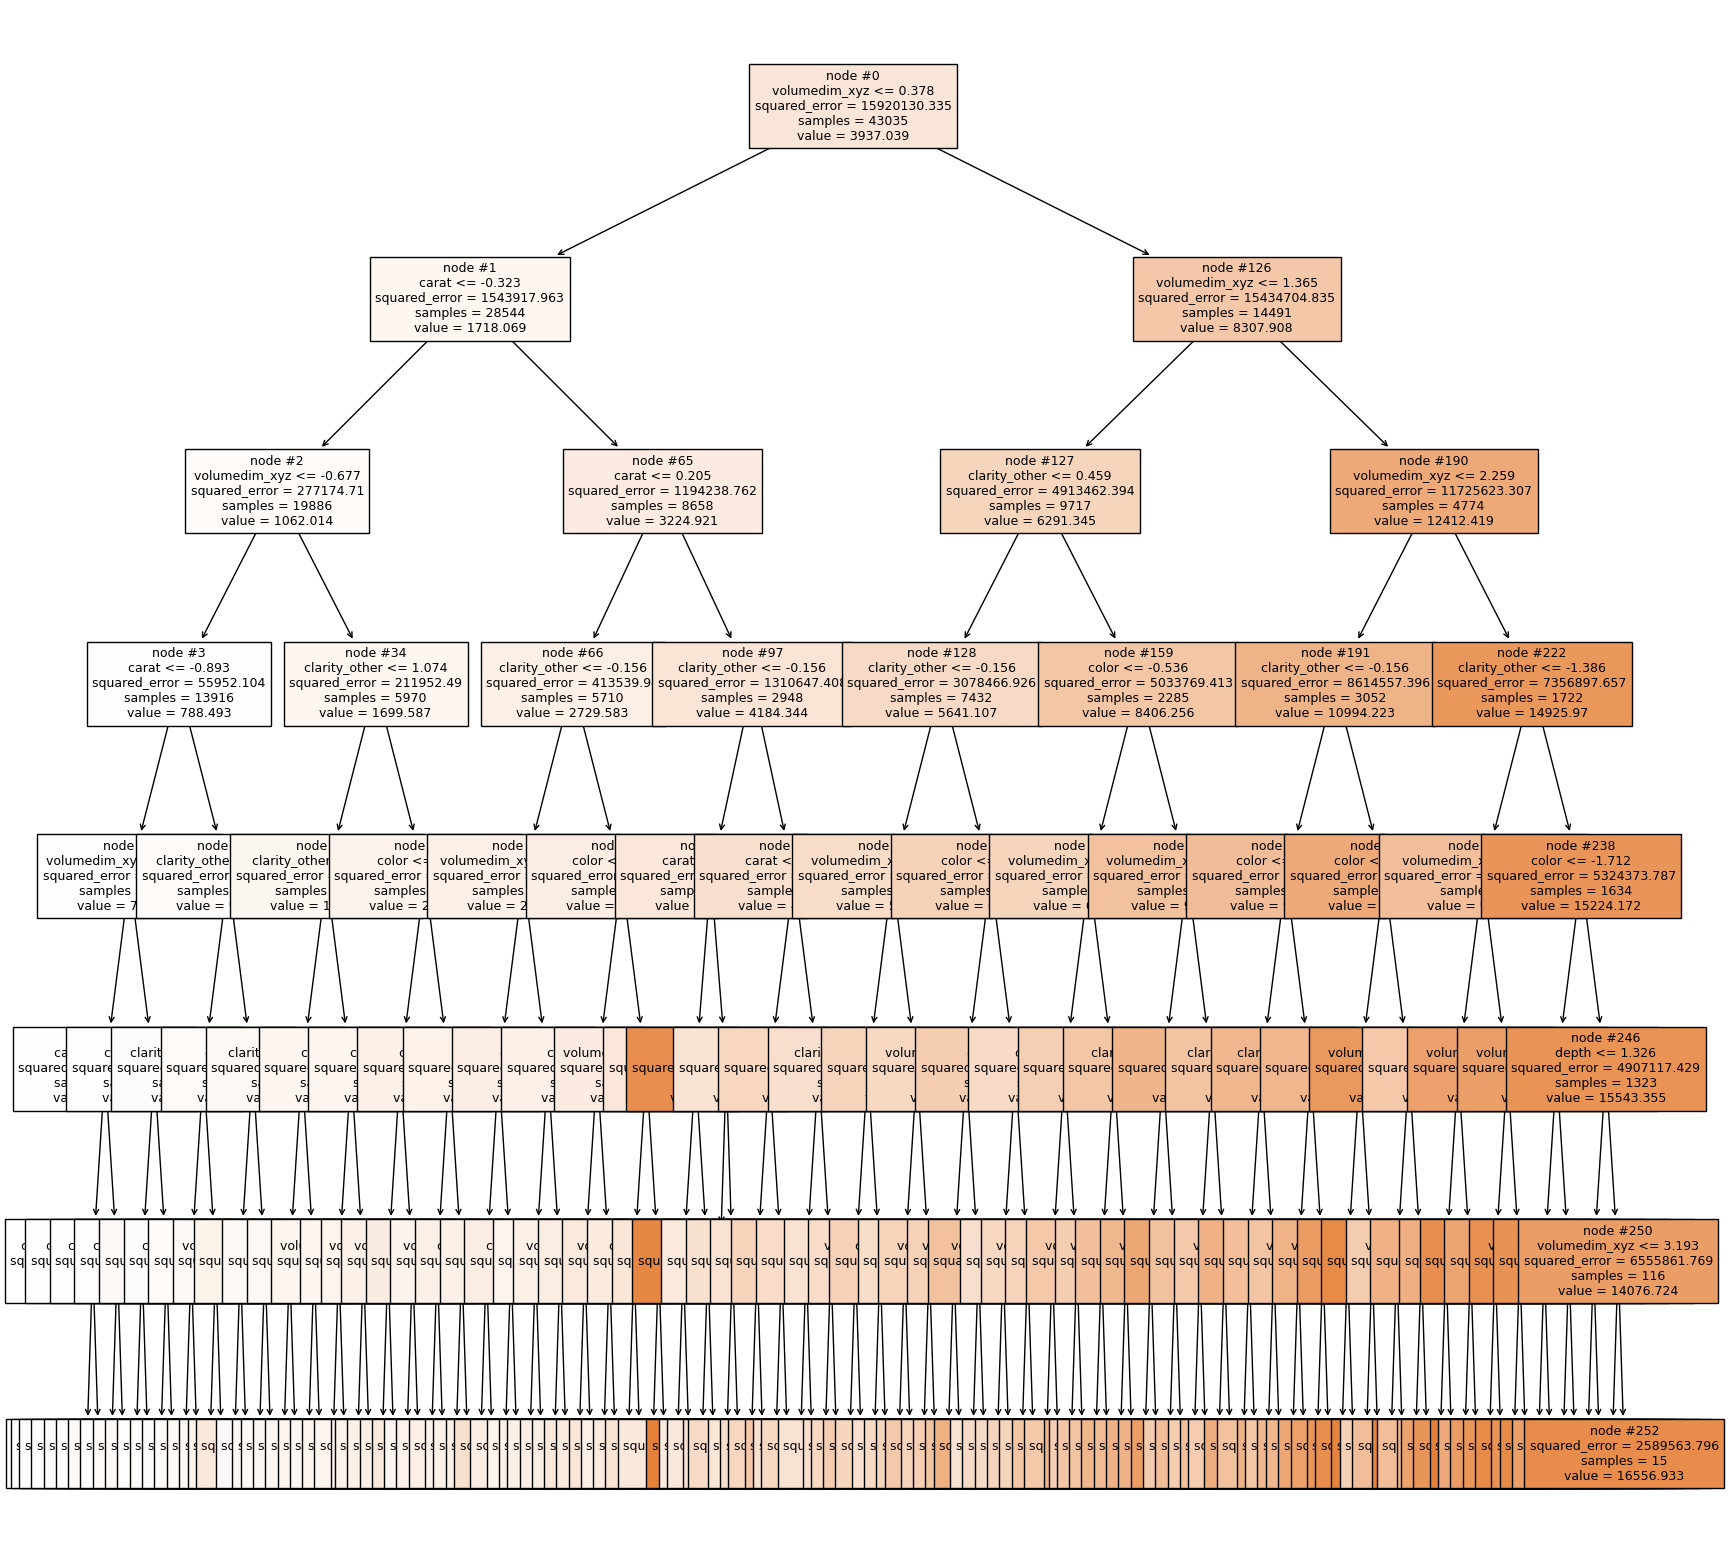

In [332]:
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor  #DecisionTreeClassifier
from sklearn import metrics

dtree_regressor = DecisionTreeRegressor(random_state = 0, max_depth = 7)
dtree_regressor.fit(X_train, y_train)
y_pred_dt0 = dtree_regressor.predict(sc.transform(X_test))

features = list(data_encoded2xyz.columns)

plt.figure(figsize = (20, 20))
tree.plot_tree(dtree_regressor, feature_names=features, filled = True, fontsize = 9, node_ids = True)
r2dt0 = r2_score(y_test, y_pred_dt0)

In [333]:
r2dt0

0.9442506193391801

In [334]:
#Root mean squared error for Decision tree
msqe_dt = mean_squared_error(y_test, y_pred_dt0)

#Calculate ROot Mean Squared Error
rmsqe_dt = np.sqrt(msqe_dt)

print("Root Mean Squared Error: ", rmsqe_dt)

Root Mean Squared Error:  939.806258860851


In [335]:
##Business RUles learned from the Decision Tree:

#### USE GRIDSearchCV for HyperParameterTuning of the Decision Tree:

In [336]:
#Choose the Decision Tree model and initialize the tree
d_tree_tuned = DecisionTreeRegressor(random_state = 0)


# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2, 10), 
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [5, 10, 20, 25]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(r2_score) #, pos_label = 1)

# Run the grid search
grid_obj_dt = GridSearchCV(d_tree_tuned, parameters, scoring = scorer, cv = 5)

# Fit the best algorithm with GridSearch on train dataset

grid_obj_dt = grid_obj_dt.fit(X_train, y_train)


# Get the best combination of parameters/best estimator
best_dtree_tuned_params = grid_obj_dt.best_estimator_

print(f"Best parameters: {best_dtree_tuned_params}")



Best parameters: DecisionTreeRegressor(max_depth=9, min_samples_leaf=5, random_state=0)


In [339]:
##Make the Prediction /Inference from the TUNED DecisionTree
# Checking performance on the training data based on the tuned model

y_pred_dt = best_dtree_tuned_params.predict(sc.transform(X_test))

r2dt = r2_score(y_test, y_pred_dt)
print("Tuned Decision_Tree R2_score: {:.3f}".format(r2dt)) 

Tuned Decision_Tree R2_score: 0.960


In [340]:
#Root mean squared error for TUNED Decision_Tree
msqe_dt2 = mean_squared_error(y_test, y_pred_dt)

#Calculate ROot Mean Squared Error
rmsqe_dt2 = np.sqrt(msqe_dt2)

print("Root Mean Squared Error: ", rmsqe_dt2)

Root Mean Squared Error:  799.0548343817175



**Check Feature Importance of the tuned Decision Tree**

In [341]:
data_encoded2xyz.columns

Index(['volumedim_xyz', 'cut', 'color', 'clarity_other', 'carat', 'depth',
       'table', 'price'],
      dtype='object')

In [342]:
data_ind = data_encoded2xyz.copy()
data_ind.drop(['price'], axis = 1, inplace = True)
data_ind.columns
print (pd.DataFrame(best_dtree_tuned_params.feature_importances_, columns = ["Imp"], index = data_ind.columns).sort_values(by = 'Imp', ascending = False))

#print (pd.DataFrame(best_dtree_tuned.feature_importances_, index = data_encoded2xyz.columns).sort_values(by = 'Imp', ascending = False)) #, columns = ["Imp"], index = data_encoded2xyz.columns).sort_values(by = 'Imp', ascending = False))

                    Imp
volumedim_xyz  0.858354
carat          0.055837
clarity_other  0.052564
color          0.031694
depth          0.000715
cut            0.000689
table          0.000147


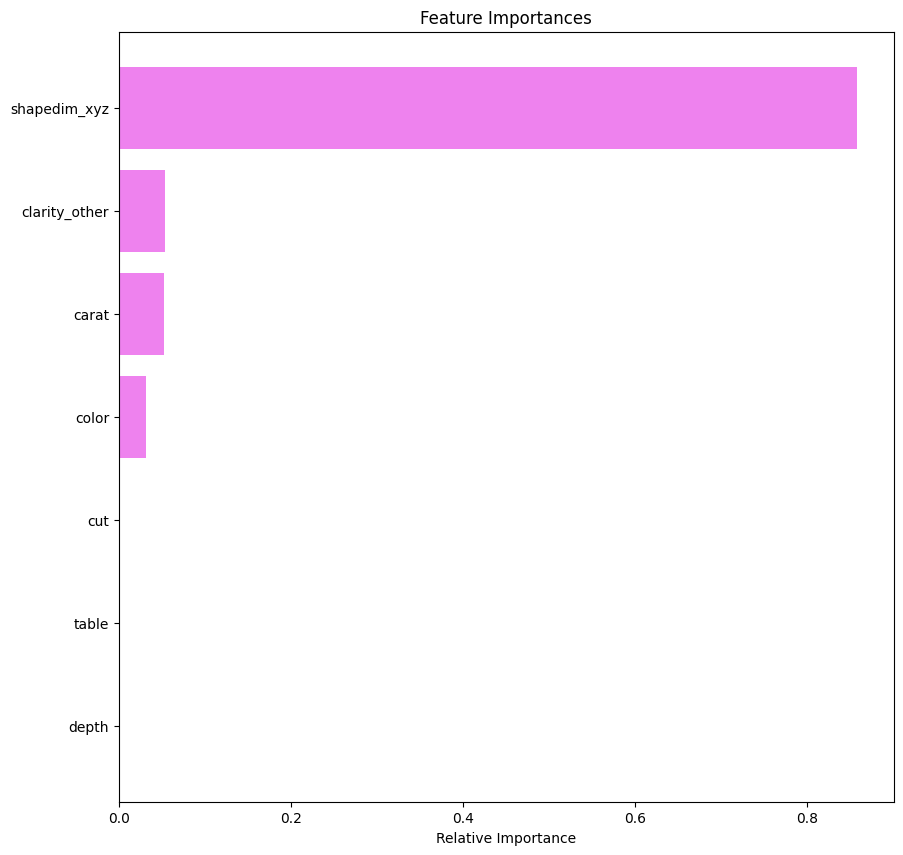

In [37]:
# Plotting the feature importance
importances = best_dtree_tuned_params.feature_importances_

indices = np.argsort(importances)

plt.figure(figsize = (10, 10))

plt.title('Feature Importances')

plt.barh(range(len(indices)), importances[indices], color = 'violet', align = 'center')

plt.yticks(range(len(indices)), [features[i] for i in indices])

plt.xlabel('Relative Importance')

plt.show()

#### XGBoost

In [343]:
#Create Training and Test sets:
X_trainxg, X_testxg, y_trainxg, y_testxg = train_test_split(X, y, test_size=0.2, random_state = 0)

In [344]:
#Scale the data before building the Models:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_trainxg = sc.fit_transform(X_trainxg)

In [345]:
#Building XGBoost Model

In [346]:
#!pip install xgboost
import xgboost
modelxg = xgboost.XGBRegressor() #xgboost model for Regression

In [347]:
#Training the model
modelxg.fit(X_trainxg, y_trainxg)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [348]:
#Inference/Prediction
X_testxg = sc.transform(X_testxg)
y_predxg = modelxg.predict(X_testxg) #(sc.transform(X_testxg))
#Compare y_pred and y_test

In [349]:
#Evaluating XGBoost model

#1. R-Squared
from sklearn.metrics import r2_score
r2_xg = r2_score(y_testxg, y_predxg)
print("R2..", r2_xg)

#2. Adjusted R-squared
k = X_testxg.shape[1] #(1) #GIves number of features in test set
n = X_testxg.shape[0]
adj_r2_xg = 1 - (1-r2_xg)*(n-1)/(n-k-1)
print("Adj R2..", adj_r2_xg)

#Root mean squared error for XGBoost Model
msqe_xg = mean_squared_error(y_testxg, y_predxg)

#Calculate ROot Mean Squared Error
rmsqe_xg = np.sqrt(msqe_xg)

print("Root Mean Squared Error: ", rmsqe_xg)
#3. k-Fold cross validationa 
#FOr evaluating the model performance on not just one split but on up to 10..to ensure the other acceptable metrics was not just a stroke of luck.


R2.. 0.9726572564492183
Adj R2.. 0.9726394535281081
Root Mean Squared Error:  658.1719265168607


In [350]:
#k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
#will return the 10 r2 result not their average
r2s = cross_val_score(estimator = modelxg,
                      X = X_trainxg, #X
                      y = y_trainxg,  #y
                      scoring = 'r2',
                      cv = 10)

print("Average R-squared/the relevant R-squared: {:.2f}".format(r2s.mean())) #0.86 is good
print("Standard Deviation: {:.2f}".format(r2s.std())) #0.04 is low and very good too meaning the R-square ranges from ((Avg Rsq - std dev) to (AvgRsq + std dev)
#compare this Avg R-squared with the previous R-squared calculated.

#Previous R-squared and StdDev on X = X and y = y
#Average R-squared/the relevant R-squared: 0.87
#Standard Deviation: 0.17

Average R-squared/the relevant R-squared: 0.97
Standard Deviation: 0.00


#### HyperParameter Tuning - FOR XGBoost

In [351]:
#Rerun the k-FOld by extending the decimal format .3f with the default model value:
#k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
#will return the 10 r2 result not their average
r2s = cross_val_score(estimator = modelxg,
                      X = X_trainxg, #X
                      y = y_trainxg, #y
                      scoring = 'r2',
                      cv = 10)

print("Average R-squared/the relevant R-squared: {:.3f}".format(r2s.mean())) #0.86 is good
print("Standard Deviation: {:.3f}".format(r2s.std()))

Average R-squared/the relevant R-squared: 0.972
Standard Deviation: 0.004


In [352]:
#next is to run the model by adjusting the max_depth(depth of tree), learning_rate(speed model will learn, the higher the faster it will learn)
#and n-estimator(number of trees in xgboost algorithm) 
#and booster(the default is 'gbtree'gradient boosting tree. Try the 'dart' which gives higher weight to the earlier trees or the first set of trees.
#model_xghp = xgboost.XGBRegressor(max_depth=4) #xgboost model for Regression
#start with only maxdepth=4,then 2 and then 1 - check the Avg-Rsq each time
#max_depth=2, learning_rate(default = 0.1)=0.05 then 0.15, keep default 0.1
#max_depth=2, learning_rate = 0.1, n_estimators = default 100, then 50 then 150

model_xghp = xgboost.XGBRegressor(max_depth=4, learning_rate=0.1, n_estimators=100) #xgboost model for Regression

In [353]:
#hyperparameter TUNing continued:
#Training the model
model_xghp.fit(X_trainxg, y_trainxg)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [354]:
#Inference/Prediction
y_predxghp = model_xghp.predict(X_testxg) #(sc.transform(X_testxg)) #X_test0 is the scaled X_test


In [355]:
#Evaluating XGBoost model - Hyperparameter Tuning

#1. R-Squared
from sklearn.metrics import r2_score
r2_xghp = r2_score(y_testxg, y_predxghp)
print("R2..", r2_xghp)

#2. Adjusted R-squared
k = X_testxg.shape[1] #(1) #GIves number of features in test set
n = X_testxg.shape[0]
adj_r2_xghp = 1 - (1-r2_xghp)*(n-1)/(n-k-1)
print("Adj R2..", adj_r2_xghp)

#Root mean squared error for XGBoost model Hyper Tuning
msqe_xghp = mean_squared_error(y_testxg, y_predxghp)

#Calculate ROot Mean Squared Error
rmsqe_xghp = np.sqrt(msqe_xghp)

print("Root Mean Squared Error: ", rmsqe_xghp)
#3. k-Fold cross validationa 
#FOr evaluating the model performance on not just one split but on up to 10..to ensure the other acceptable metrics was not just a stroke of luck.


R2.. 0.9684538738601325
Adj R2.. 0.9684333341072743
Root Mean Squared Error:  706.9542786084148


In [356]:
#k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
#will return the 10 r2 result not their average
r2s_xghpk = cross_val_score(estimator = model_xghp,
                      X = X_trainxg, #X
                      y = y_trainxg, #y
                      scoring = 'r2',
                      cv = 10)

print("Average R-squared/the relevant R-squared: {:.2f}".format(r2s_xghpk.mean())) #0.86 is good
print("Standard Deviation: {:.2f}".format(r2s_xghpk.std())) 

Average R-squared/the relevant R-squared: 0.97
Standard Deviation: 0.00


In [357]:
#Insight
# The default values gave better score which ended up being lower than the regular XGboost model.
#XGB00sst R2- 0.87
#XGBoost_Tuned - best=0.83

In [358]:
##-------

#### -----LightGBM-----

In [359]:
##Building the Model
#!pip install lightgbm
import lightgbm as lgb
model_light = lgb.LGBMRegressor()


In [360]:
#Training the LightGBM model
model_light.fit(X_train, y_train)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000902 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 781
[LightGBM] [Info] Number of data points in the train set: 43035, number of used features: 7
[LightGBM] [Info] Start training from score 3937.038852


LGBMRegressor()

In [361]:
##Inference
y_pred_light = model_light.predict(sc.transform(X_test))

In [362]:
##Evaluating LightGBM model

#1. R-Squared
from sklearn.metrics import r2_score
r2_light = r2_score(y_test, y_pred_light)
print("R2..", r2_light)

#2. Adjusted R-squared
k = X_test0.shape[1] #GIves number of features in test set
n = X_test0.shape[0]
adj_r2_light = 1 - (1-r2_light)*(n-1)/(n-k-1)
print("Adj R2..", adj_r2_light)

#Root mean squared error for LightGBM model Hyper Tuning
msqe_lgb = mean_squared_error(y_test, y_pred_light)

#Calculate ROot Mean Squared Error
rmsqe_lgb = np.sqrt(msqe_lgb)

print("Root Mean Squared Error: ", rmsqe_lgb)
#3. k-Fold cross validationa 
#FOr evaluating the model performance on not just one split but on up to 10..to ensure the other acceptable metrics was not just a stroke of luck.


R2.. 0.9728725159750746
Adj R2.. 0.9728548532099203
Root Mean Squared Error:  655.5760325808835


In [363]:
#k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
#will return the 10 r2 result not their average
r2s_lightk = cross_val_score(estimator = model_light,
                      X = X_train, #X
                      y = y_train,  #y
                      scoring = 'r2',
                      cv = 10)

print("Average R-squared/the relevant R-squared: {:.2f} %".format(r2s_lightk.mean()*100)) #0.86 is good
print("Standard Deviation: {:.2f}".format(r2s_lightk.std())) #0.04 is low and very good too meaning the R-square ranges from ((Avg Rsq - std dev) to (AvgRsq + std dev)
#compare this Avg R-squared with the previous R-squared calculated.

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000810 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 769
[LightGBM] [Info] Number of data points in the train set: 38731, number of used features: 7
[LightGBM] [Info] Start training from score 3941.409285
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000236 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 766
[LightGBM] [Info] Number of data points in the train set: 38731, number of used features: 7
[LightGBM] [Info] Start training from score 3933.863159
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000228 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total 

In [364]:
#compare the lightGBM k-fold result with XGBoost

In [365]:
##HyperParameter Tuning of LightGBM

In [366]:
##Using GridSearch to improve k-fold result
from sklearn.model_selection import GridSearchCV
parameters = {'num_leaves':[29,30,31,32,33], 'learning_rate':[0.08, 0.09,0,1,0.11,0.12], 'n_estimators':[89,90,100,110,120]} #enter in a dictionary'name of parameter to test'
#default of max_depth=-1 means there is no limit to the number of depths to be tested.
#num_leaves(default value=31) - test 29,30,31,32 and 33
#learning_rate(default =0.1) - test 0.08, 0.09,0,1,0.11 and 0.12
#n_estimators(number of tress-default=100)-test 89,90,100,110 and 120
#Note-better to test the 5 values close/centered around the default values.
grid_search = GridSearchCV(estimator = model_light,
                           param_grid = parameters,
                           scoring = 'r2',
                           cv=10) #cv = number of k-folds to test

grid_search.fit(X_train, y_train) #(X, y)
best_r2 = grid_search.best_score_  #attribute
best_parameters = grid_search.best_params_
print("Best R-Squared: {:.2f} %".format(best_r2 * 100)) #to convert to percent%
print("Best parameters:", best_parameters)
      

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000796 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 769
[LightGBM] [Info] Number of data points in the train set: 38731, number of used features: 7
[LightGBM] [Info] Start training from score 3941.409285
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000809 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 766
[LightGBM] [Info] Number of data points in the train set: 38731, number of used features: 7
[LightGBM] [Info] Start training from score 3933.863159
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005210 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 770
[LightGBM] [Info] Number of data points in the train se

C:\Users\adann\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
250 fits failed out of a total of 1500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
250 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\adann\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\adann\anaconda3\Lib\site-packages\lightgbm\sklearn.py", line 1398, in fit
    super().fit(
  File "C:\Users\adann\anaconda3\Lib\site-packages\lightgbm\sklearn.py", line 1049, in fit
    self._Booster = train(
                    ^^^^^^
  File "C:\Users\adann\anaconda3\Lib\site-packages\li

Best R-Squared: 97.23 %
Best parameters: {'learning_rate': 0.11, 'n_estimators': 120, 'num_leaves': 33}


In [ ]:
#-------BEST MODEL------for DEPLOYMent

In [235]:
#x_scl = sc.transform(X)
#try on the entire dataset for better result?

In [397]:
X_train.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [367]:
best_model = xgboost.XGBRegressor() #xgboost model for Regression
##Training the model
best_model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [368]:
##------

In [369]:
#pip install joblib

In [370]:
joblib.dump(best_model, "final_xgboost_model.pkl")

['final_xgboost_model.pkl']

In [371]:
joblib.dump(sc, "Standard_scaler.pkl")

['Standard_scaler.pkl']

In [372]:
joblib.dump(ordenc, "Ordinal_encoder.pkl")

['Ordinal_encoder.pkl']

In [373]:
#Now, Load and retest XGBoost selected as the best model, Scaler and the Ordinal_Encoder for Streamlit deployment

In [374]:
df_diam=pd.read_csv("C:/Users/adann/Desktop/gitDocuments/sds_diamond_beginner_project/type of the Diamond new.csv")

In [375]:
df_diam['clarity_other'] = ["Other" if x =="I1" or x =="IF" else x for x in df_diam['clarity']] #repalcing with list comprehension

In [376]:
loaded_bestmodel = joblib.load("final_xgboost_model.pkl")
loaded_bestmodel

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [377]:
loaded_scaler = joblib.load("Standard_scaler.pkl")
loaded_scaler

StandardScaler()

In [378]:
loaded_labencoder = joblib.load("Ordinal_encoder.pkl")
loaded_labencoder

OrdinalEncoder(categories=[['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'],
                           ['J', 'I', 'H', 'G', 'F', 'E', 'D'],
                           ['Other', 'SI1', 'SI2', 'VS2', 'VS1', 'VVS2',
                            'VVS1']])

In [379]:
df_diam.head()

cut color clarity  carat  depth  table  price  x (Premium)  z (Very Good)  \
0  Fair     E     VS2   0.22   65.1   61.0    337         3.87           2.49   
1  Fair     E     SI2   0.86   55.1   69.0   2757         6.45           3.52   
2  Fair     F     SI2   0.96   66.3   62.0   2759         6.27           4.07   
3  Fair     F     VS2   0.70   64.5   57.0   2762         5.57           3.58   
4  Fair     F     VS2   0.70   65.3   55.0   2762         5.63           3.66   

   y (Good) clarity_other  
0      3.78           VS2  
1      6.33           SI2  
2      5.95           SI2  
3      5.53           VS2  
4      5.58           VS2

In [380]:
df_diam['x (Premium)'] * df_diam['z (Very Good)'] * df_diam['y (Good)']

0         36.425214
1        143.716320
2        151.837455
3        110.271518
4        114.980364
            ...    
53935    111.489755
53936    112.317030
53937    114.126912
53938    113.588332
53939    114.449728
Length: 53940, dtype: float64

In [381]:
df_diam["volumedim_xyz"] = df_diam['x (Premium)'] * df_diam['z (Very Good)'] * df_diam['y (Good)']

In [382]:
df_diam.drop(columns=['x (Premium)', 'z (Very Good)', 'y (Good)', 'clarity'], inplace = True)

In [398]:
df_diam.head()

cut color  carat  depth  table  price clarity_other  volumedim_xyz
0  Fair     E   0.22   65.1   61.0    337           VS2      36.425214
1  Fair     E   0.86   55.1   69.0   2757           SI2     143.716320
2  Fair     F   0.96   66.3   62.0   2759           SI2     151.837455
3  Fair     F   0.70   64.5   57.0   2762           VS2     110.271518
4  Fair     F   0.70   65.3   55.0   2762           VS2     114.980364

In [399]:
#Reorder the columns..
df_diam = df_diam[['volumedim_xyz', 'cut', 'color', 'clarity_other', 'carat', 'depth', 'table','price',]]

In [400]:
X_train[0]

array([-1.13557986,  0.98331993,  0.346013  ,  0.151065  , -1.17834384,
       -0.3793577 , -0.20939061])

In [401]:
df_diamsub = df_diam.iloc[:10].copy()
df_diamsub

volumedim_xyz   cut color clarity_other  carat  depth  table  price
0      36.425214  Fair     E           VS2   0.22   65.1   61.0    337
1     143.716320  Fair     E           SI2   0.86   55.1   69.0   2757
2     151.837455  Fair     F           SI2   0.96   66.3   62.0   2759
3     110.271518  Fair     F           VS2   0.70   64.5   57.0   2762
4     114.980364  Fair     F           VS2   0.70   65.3   55.0   2762
5     146.234907  Fair     H           SI2   0.91   64.4   57.0   2763
6     142.672815  Fair     H           SI2   0.91   65.7   60.0   2763
7     147.363480  Fair     H           SI2   0.98   67.9   60.0   2777
8     137.474460  Fair     G           SI1   0.84   55.1   67.0   2782
9     157.415427  Fair     E         Other   1.01   64.5   58.0   2788

In [402]:
cat_cols = ['cut', 'color', 'clarity_other']

In [403]:
df_diamsub[cat_cols]= loaded_labencoder.transform(df_diamsub[cat_cols])
df_diamsub

volumedim_xyz  cut  color  clarity_other  carat  depth  table  price
0      36.425214  0.0    5.0            3.0   0.22   65.1   61.0    337
1     143.716320  0.0    5.0            2.0   0.86   55.1   69.0   2757
2     151.837455  0.0    4.0            2.0   0.96   66.3   62.0   2759
3     110.271518  0.0    4.0            3.0   0.70   64.5   57.0   2762
4     114.980364  0.0    4.0            3.0   0.70   65.3   55.0   2762
5     146.234907  0.0    2.0            2.0   0.91   64.4   57.0   2763
6     142.672815  0.0    2.0            2.0   0.91   65.7   60.0   2763
7     147.363480  0.0    2.0            2.0   0.98   67.9   60.0   2777
8     137.474460  0.0    3.0            1.0   0.84   55.1   67.0   2782
9     157.415427  0.0    5.0            0.0   1.01   64.5   58.0   2788

In [404]:
df_diamsub2 = df_diamsub.drop(columns = ['price'])
df_diamsub2.head(3)

volumedim_xyz  cut  color  clarity_other  carat  depth  table
0      36.425214  0.0    5.0            3.0   0.22   65.1   61.0
1     143.716320  0.0    5.0            2.0   0.86   55.1   69.0
2     151.837455  0.0    4.0            2.0   0.96   66.3   62.0

In [405]:
df_diamscaled = loaded_scaler.transform(df_diamsub2)
df_diamscaled

array([[-1.18971654, -2.59643459,  0.93406566,  0.151065  , -1.2205828 ,
         2.33493885,  1.57629001],
       [ 0.17608229, -2.59643459,  0.93406566, -0.46392719,  0.13106396,
        -4.6247959 ,  5.14765123],
       [ 0.27946305, -2.59643459,  0.346013  , -0.46392719,  0.34225876,
         3.17010702,  2.02271016],
       [-0.24966476, -2.59643459,  0.346013  ,  0.151065  , -0.20684773,
         1.91735477, -0.20939061],
       [-0.18972189, -2.59643459,  0.346013  ,  0.151065  , -0.20684773,
         2.47413355, -1.10223091],
       [ 0.2081435 , -2.59643459, -0.83009232, -0.46392719,  0.23666136,
         1.84775742, -0.20939061],
       [ 0.16279863, -2.59643459, -0.83009232, -0.46392719,  0.23666136,
         2.75252294,  1.12986985],
       [ 0.22251006, -2.59643459, -0.83009232, -0.46392719,  0.38449773,
         4.28366458,  1.12986985],
       [ 0.09662439, -2.59643459, -0.24203966, -1.07891938,  0.088825  ,
        -4.6247959 ,  4.25481092],
       [ 0.35046975, -2.5964

In [406]:
y_predt = loaded_bestmodel.predict(df_diamscaled)
y_predt

array([ 373.47083, 2992.6365 , 2964.3174 , 2536.5667 , 2544.6138 ,
       2944.349  , 2780.262  , 2830.6753 , 2587.184  , 2886.2659 ],
      dtype=float32)

In [407]:
df_diamsub['y_predt'] = y_predt
col_order = ['cut', 'color', 'clarity_other', 'carat', 'depth', 'table', 'volumedim_xyz', 'price', 'y_predt']
df_diamsub = df_diamsub[col_order]
df_diamsub

cut  color  clarity_other  carat  depth  table  volumedim_xyz  price  \
0  0.0    5.0            3.0   0.22   65.1   61.0      36.425214    337   
1  0.0    5.0            2.0   0.86   55.1   69.0     143.716320   2757   
2  0.0    4.0            2.0   0.96   66.3   62.0     151.837455   2759   
3  0.0    4.0            3.0   0.70   64.5   57.0     110.271518   2762   
4  0.0    4.0            3.0   0.70   65.3   55.0     114.980364   2762   
5  0.0    2.0            2.0   0.91   64.4   57.0     146.234907   2763   
6  0.0    2.0            2.0   0.91   65.7   60.0     142.672815   2763   
7  0.0    2.0            2.0   0.98   67.9   60.0     147.363480   2777   
8  0.0    3.0            1.0   0.84   55.1   67.0     137.474460   2782   
9  0.0    5.0            0.0   1.01   64.5   58.0     157.415427   2788   

       y_predt  
0   373.470825  
1  2992.636475  
2  2964.317383  
3  2536.566650  
4  2544.613770  
5  2944.349121  
6  2780.261963  
7  2830.675293  
8  2587.184082  
9  2886.265869